In [1]:
import numpy as np
import random
import csv
import os
import time
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from RCRI_Net import get_model,get_loss,CustomDataset,DataLoader

In [2]:
dataset  = 'flavia'
DAnumber = '1s'
train_batch_size = 15
train_data = np.load(f"data/contour/train_dataset/{dataset}_cls_train_data_{DAnumber}.npy")
train_label = np.load(f"data/contour/train_dataset/{dataset}_cls_train_label_{DAnumber}.npy")
train_data = train_data.astype(np.float32)
print(len(train_label))
train_dataset = CustomDataset(train_data, train_label)
train_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)

1545


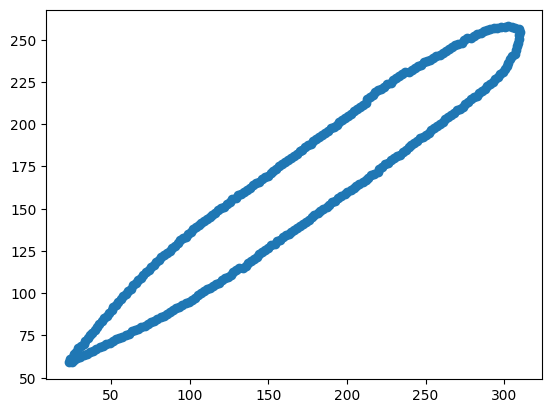

In [3]:
id_img = 13
plt.scatter(train_data[id_img][:,0],train_data[id_img][:,1])

In [4]:
num_class = train_label[-1]+1
print("The number of class is : ",num_class)
Model = get_model(num_class)
Model.cuda()
pytorch_n_params = sum(p.numel() for p in Model.parameters() if p.requires_grad)
print('Total trainable params : ', pytorch_n_params)

The number of class is :  32
Total trainable params :  422624


In [5]:
# Training：
loss_func = get_loss()
loss_func.cuda()
optimizer = torch.optim.Adam(
            Model.parameters(),
            lr=0.001,
            betas=(0.9, 0.999),
            eps=1e-08,
            weight_decay=1e-4
        )
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
global_epoch = 0
global_step = 0
best_instance_acc = 0.0
best_class_acc = 0.0
loss_logger = []
test_loss_logger = []
train_instance_acc_list = []
test_instance_acc_list = []
train_loss = []
test_loss = []
print('Start training...')
for epoch in trange(601):
    mean_correct = []
    for index, (lines,labels) in enumerate(train_loader):
        lines = lines.cuda()
        labels = labels.cuda()
        optimizer.zero_grad()
        pred, trans_feat = Model(lines)
        loss = loss_func(pred, labels.long())
        pred_choice = pred.data.max(1)[1]
        correct = pred_choice.eq(labels.long().data).cpu().sum()
        mean_correct.append(correct.item() / float(lines.size()[0]))
        loss.backward()
        optimizer.step()
    print("Now is Epoch{}: loss = {}".format(epoch+1,loss.item()))
    # Save the Loss and Accuracy
    train_loss.append(loss.item())
    train_instance_acc = np.mean(mean_correct)
    print('Train Instance Accuracy: {}'.format(train_instance_acc))
    train_instance_acc_list.append(train_instance_acc)
    # Every 100 Epochs, a model weight is saved
    if epoch%10==0:
        m_PATH = f"./models/flavia/{dataset}_{DAnumber}_Epoch_"+str(epoch)+".pth"
        torch.save(Model.state_dict(), m_PATH)

Start training...


  0%|          | 1/601 [00:04<46:14,  4.62s/it]

Now is Epoch1: loss = 1.9347318410873413
Train Instance Accuracy: 0.3035598705501618


  0%|          | 2/601 [00:07<36:50,  3.69s/it]

Now is Epoch2: loss = 1.2674587965011597
Train Instance Accuracy: 0.5902912621359223


  0%|          | 3/601 [00:10<33:50,  3.40s/it]

Now is Epoch3: loss = 1.025500774383545
Train Instance Accuracy: 0.7236245954692556


  1%|          | 4/601 [00:13<32:08,  3.23s/it]

Now is Epoch4: loss = 0.4772724509239197
Train Instance Accuracy: 0.7902912621359225


  1%|          | 5/601 [00:16<31:18,  3.15s/it]

Now is Epoch5: loss = 0.623756468296051
Train Instance Accuracy: 0.8355987055016181


  1%|          | 6/601 [00:19<30:38,  3.09s/it]

Now is Epoch6: loss = 0.6909488439559937
Train Instance Accuracy: 0.8517799352750809


  1%|          | 7/601 [00:22<30:17,  3.06s/it]

Now is Epoch7: loss = 0.6521051526069641
Train Instance Accuracy: 0.8750809061488672


  1%|▏         | 8/601 [00:25<30:01,  3.04s/it]

Now is Epoch8: loss = 0.34295716881752014
Train Instance Accuracy: 0.9009708737864077


  1%|▏         | 9/601 [00:28<29:56,  3.03s/it]

Now is Epoch9: loss = 0.29180827736854553
Train Instance Accuracy: 0.9048543689320386


  2%|▏         | 10/601 [00:31<29:58,  3.04s/it]

Now is Epoch10: loss = 0.47723332047462463
Train Instance Accuracy: 0.9203883495145632


  2%|▏         | 11/601 [00:34<29:26,  2.99s/it]

Now is Epoch11: loss = 0.3193591237068176
Train Instance Accuracy: 0.9242718446601942


  2%|▏         | 12/601 [00:37<28:53,  2.94s/it]

Now is Epoch12: loss = 0.2023703008890152
Train Instance Accuracy: 0.932686084142395


  2%|▏         | 13/601 [00:40<28:28,  2.91s/it]

Now is Epoch13: loss = 0.2125871777534485
Train Instance Accuracy: 0.9288025889967639


  2%|▏         | 14/601 [00:43<28:09,  2.88s/it]

Now is Epoch14: loss = 0.1594257950782776
Train Instance Accuracy: 0.9333333333333333


  2%|▏         | 15/601 [00:45<28:02,  2.87s/it]

Now is Epoch15: loss = 0.0974835455417633
Train Instance Accuracy: 0.9488673139158578


  3%|▎         | 16/601 [00:48<27:58,  2.87s/it]

Now is Epoch16: loss = 0.13063852488994598
Train Instance Accuracy: 0.96957928802589


  3%|▎         | 17/601 [00:51<27:44,  2.85s/it]

Now is Epoch17: loss = 0.1380198746919632
Train Instance Accuracy: 0.9585760517799353


  3%|▎         | 18/601 [00:54<27:36,  2.84s/it]

Now is Epoch18: loss = 0.13431359827518463
Train Instance Accuracy: 0.9508090614886735


  3%|▎         | 19/601 [00:57<27:30,  2.84s/it]

Now is Epoch19: loss = 0.10141095519065857
Train Instance Accuracy: 0.9631067961165051


  3%|▎         | 20/601 [01:00<27:15,  2.81s/it]

Now is Epoch20: loss = 0.099528007209301
Train Instance Accuracy: 0.9585760517799353


  3%|▎         | 21/601 [01:02<27:10,  2.81s/it]

Now is Epoch21: loss = 0.2560499906539917
Train Instance Accuracy: 0.9579288025889969


  4%|▎         | 22/601 [01:05<27:19,  2.83s/it]

Now is Epoch22: loss = 0.10627834498882294
Train Instance Accuracy: 0.961812297734628


  4%|▍         | 23/601 [01:08<27:15,  2.83s/it]

Now is Epoch23: loss = 0.020366249606013298
Train Instance Accuracy: 0.9663430420711977


  4%|▍         | 24/601 [01:11<27:09,  2.82s/it]

Now is Epoch24: loss = 0.06628220528364182
Train Instance Accuracy: 0.9650485436893205


  4%|▍         | 25/601 [01:14<26:44,  2.78s/it]

Now is Epoch25: loss = 0.10139261186122894
Train Instance Accuracy: 0.9572815533980583


  4%|▍         | 26/601 [01:16<26:44,  2.79s/it]

Now is Epoch26: loss = 0.11090000718832016
Train Instance Accuracy: 0.9579288025889969


  4%|▍         | 27/601 [01:19<26:41,  2.79s/it]

Now is Epoch27: loss = 0.07673732191324234
Train Instance Accuracy: 0.9682847896440131


  5%|▍         | 28/601 [01:22<26:37,  2.79s/it]

Now is Epoch28: loss = 0.03148462623357773
Train Instance Accuracy: 0.9728155339805825


  5%|▍         | 29/601 [01:25<26:39,  2.80s/it]

Now is Epoch29: loss = 0.0323052816092968
Train Instance Accuracy: 0.9825242718446604


  5%|▍         | 30/601 [01:28<26:36,  2.80s/it]

Now is Epoch30: loss = 0.046298734843730927
Train Instance Accuracy: 0.9721682847896441


  5%|▌         | 31/601 [01:30<26:24,  2.78s/it]

Now is Epoch31: loss = 0.00443752808496356
Train Instance Accuracy: 0.9779935275080908


  5%|▌         | 32/601 [01:33<26:21,  2.78s/it]

Now is Epoch32: loss = 0.08326271921396255
Train Instance Accuracy: 0.9766990291262138


  5%|▌         | 33/601 [01:36<26:19,  2.78s/it]

Now is Epoch33: loss = 0.1773386150598526
Train Instance Accuracy: 0.9656957928802591


  6%|▌         | 34/601 [01:39<26:20,  2.79s/it]

Now is Epoch34: loss = 0.029672447592020035
Train Instance Accuracy: 0.9708737864077671


  6%|▌         | 35/601 [01:41<26:30,  2.81s/it]

Now is Epoch35: loss = 0.05617942661046982
Train Instance Accuracy: 0.9728155339805827


  6%|▌         | 36/601 [01:44<26:43,  2.84s/it]

Now is Epoch36: loss = 0.00834769569337368
Train Instance Accuracy: 0.9838187702265372


  6%|▌         | 37/601 [01:47<26:47,  2.85s/it]

Now is Epoch37: loss = 0.04197286069393158
Train Instance Accuracy: 0.9864077669902915


  6%|▋         | 38/601 [01:50<26:47,  2.85s/it]

Now is Epoch38: loss = 0.02810819260776043
Train Instance Accuracy: 0.9851132686084144


  6%|▋         | 39/601 [01:53<26:45,  2.86s/it]

Now is Epoch39: loss = 0.10665126144886017
Train Instance Accuracy: 0.9766990291262136


  7%|▋         | 40/601 [01:56<26:55,  2.88s/it]

Now is Epoch40: loss = 0.11935447156429291
Train Instance Accuracy: 0.9669902912621359


  7%|▋         | 41/601 [01:59<26:50,  2.88s/it]

Now is Epoch41: loss = 0.03764097020030022
Train Instance Accuracy: 0.9618122977346281


  7%|▋         | 42/601 [02:02<26:33,  2.85s/it]

Now is Epoch42: loss = 0.0770954117178917
Train Instance Accuracy: 0.9825242718446604


  7%|▋         | 43/601 [02:04<26:36,  2.86s/it]

Now is Epoch43: loss = 0.03515559807419777
Train Instance Accuracy: 0.9851132686084143


  7%|▋         | 44/601 [02:07<26:36,  2.87s/it]

Now is Epoch44: loss = 0.2833847999572754
Train Instance Accuracy: 0.9637540453074434


  7%|▋         | 45/601 [02:10<26:31,  2.86s/it]

Now is Epoch45: loss = 0.017924955114722252
Train Instance Accuracy: 0.9799352750809063


  8%|▊         | 46/601 [02:13<26:32,  2.87s/it]

Now is Epoch46: loss = 0.01816808618605137
Train Instance Accuracy: 0.9838187702265373


  8%|▊         | 47/601 [02:16<26:32,  2.87s/it]

Now is Epoch47: loss = 0.006042328663170338
Train Instance Accuracy: 0.9889967637540453


  8%|▊         | 48/601 [02:19<26:36,  2.89s/it]

Now is Epoch48: loss = 0.07647611200809479
Train Instance Accuracy: 0.9766990291262136


  8%|▊         | 49/601 [02:22<27:00,  2.94s/it]

Now is Epoch49: loss = 0.006488381884992123
Train Instance Accuracy: 0.977346278317152


  8%|▊         | 50/601 [02:25<26:53,  2.93s/it]

Now is Epoch50: loss = 0.0129725132137537
Train Instance Accuracy: 0.9741100323624596


  8%|▊         | 51/601 [02:28<26:29,  2.89s/it]

Now is Epoch51: loss = 0.005927263759076595
Train Instance Accuracy: 0.9818770226537218


  9%|▊         | 52/601 [02:30<26:15,  2.87s/it]

Now is Epoch52: loss = 0.04826835170388222
Train Instance Accuracy: 0.9831715210355988


  9%|▉         | 53/601 [02:33<26:10,  2.87s/it]

Now is Epoch53: loss = 0.004177650902420282
Train Instance Accuracy: 0.9754045307443368


  9%|▉         | 54/601 [02:36<26:06,  2.86s/it]

Now is Epoch54: loss = 0.007433220744132996
Train Instance Accuracy: 0.9857605177993529


  9%|▉         | 55/601 [02:39<26:02,  2.86s/it]

Now is Epoch55: loss = 0.02597057819366455
Train Instance Accuracy: 0.9812297734627833


  9%|▉         | 56/601 [02:42<26:11,  2.88s/it]

Now is Epoch56: loss = 0.016753144562244415
Train Instance Accuracy: 0.9902912621359224


  9%|▉         | 57/601 [02:45<25:57,  2.86s/it]

Now is Epoch57: loss = 0.012169163674116135
Train Instance Accuracy: 0.9883495145631069


 10%|▉         | 58/601 [02:48<26:04,  2.88s/it]

Now is Epoch58: loss = 0.03119351901113987
Train Instance Accuracy: 0.9734627831715211


 10%|▉         | 59/601 [02:50<25:38,  2.84s/it]

Now is Epoch59: loss = 0.0032689531799405813
Train Instance Accuracy: 0.9799352750809063


 10%|▉         | 60/601 [02:53<25:20,  2.81s/it]

Now is Epoch60: loss = 0.051051970571279526
Train Instance Accuracy: 0.9715210355987057


 10%|█         | 61/601 [02:56<25:35,  2.84s/it]

Now is Epoch61: loss = 0.024161113426089287
Train Instance Accuracy: 0.9663430420711974


 10%|█         | 62/601 [02:59<25:34,  2.85s/it]

Now is Epoch62: loss = 0.21760520339012146
Train Instance Accuracy: 0.9851132686084143


 10%|█         | 63/601 [03:02<25:25,  2.83s/it]

Now is Epoch63: loss = 0.003564495360478759
Train Instance Accuracy: 0.970873786407767


 11%|█         | 64/601 [03:05<25:14,  2.82s/it]

Now is Epoch64: loss = 0.031197376549243927
Train Instance Accuracy: 0.9773462783171523


 11%|█         | 65/601 [03:07<25:08,  2.81s/it]

Now is Epoch65: loss = 0.0014927354641258717
Train Instance Accuracy: 0.9864077669902913


 11%|█         | 66/601 [03:10<25:12,  2.83s/it]

Now is Epoch66: loss = 0.017116131260991096
Train Instance Accuracy: 0.9922330097087381


 11%|█         | 67/601 [03:13<25:09,  2.83s/it]

Now is Epoch67: loss = 0.012509684078395367
Train Instance Accuracy: 0.9864077669902915


 11%|█▏        | 68/601 [03:16<25:16,  2.84s/it]

Now is Epoch68: loss = 0.02259119227528572
Train Instance Accuracy: 0.9825242718446604


 11%|█▏        | 69/601 [03:19<25:43,  2.90s/it]

Now is Epoch69: loss = 0.04406169801950455
Train Instance Accuracy: 0.9857605177993529


 12%|█▏        | 70/601 [03:22<25:39,  2.90s/it]

Now is Epoch70: loss = 0.010818596929311752
Train Instance Accuracy: 0.9883495145631068


 12%|█▏        | 71/601 [03:25<25:29,  2.89s/it]

Now is Epoch71: loss = 0.010353730991482735
Train Instance Accuracy: 0.9928802588996765


 12%|█▏        | 72/601 [03:28<25:38,  2.91s/it]

Now is Epoch72: loss = 0.02226620353758335
Train Instance Accuracy: 0.993527508090615


 12%|█▏        | 73/601 [03:31<25:52,  2.94s/it]

Now is Epoch73: loss = 0.02212292142212391
Train Instance Accuracy: 0.9857605177993529


 12%|█▏        | 74/601 [03:34<25:47,  2.94s/it]

Now is Epoch74: loss = 0.03825046494603157
Train Instance Accuracy: 0.9883495145631069


 12%|█▏        | 75/601 [03:36<24:57,  2.85s/it]

Now is Epoch75: loss = 0.12932747602462769
Train Instance Accuracy: 0.9883495145631069


 13%|█▎        | 76/601 [03:39<24:38,  2.82s/it]

Now is Epoch76: loss = 0.006164116319268942
Train Instance Accuracy: 0.9831715210355988


 13%|█▎        | 77/601 [03:42<24:17,  2.78s/it]

Now is Epoch77: loss = 9.861670696409419e-05
Train Instance Accuracy: 0.9786407766990293


 13%|█▎        | 78/601 [03:45<24:22,  2.80s/it]

Now is Epoch78: loss = 0.005015648435801268
Train Instance Accuracy: 0.9857605177993529


 13%|█▎        | 79/601 [03:47<24:30,  2.82s/it]

Now is Epoch79: loss = 0.002409669803455472
Train Instance Accuracy: 0.9818770226537218


 13%|█▎        | 80/601 [03:50<24:38,  2.84s/it]

Now is Epoch80: loss = 0.8605495691299438
Train Instance Accuracy: 0.9773462783171522


 13%|█▎        | 81/601 [03:53<24:40,  2.85s/it]

Now is Epoch81: loss = 0.11932941526174545
Train Instance Accuracy: 0.9708737864077671


 14%|█▎        | 82/601 [03:56<24:32,  2.84s/it]

Now is Epoch82: loss = 0.008911484852433205
Train Instance Accuracy: 0.9779935275080907


 14%|█▍        | 83/601 [03:59<24:25,  2.83s/it]

Now is Epoch83: loss = 0.012058485299348831
Train Instance Accuracy: 0.9870550161812299


 14%|█▍        | 84/601 [04:02<24:27,  2.84s/it]

Now is Epoch84: loss = 0.16475771367549896
Train Instance Accuracy: 0.9870550161812298


 14%|█▍        | 85/601 [04:04<24:22,  2.83s/it]

Now is Epoch85: loss = 0.055290546268224716
Train Instance Accuracy: 0.9883495145631069


 14%|█▍        | 86/601 [04:07<24:28,  2.85s/it]

Now is Epoch86: loss = 0.019491367042064667
Train Instance Accuracy: 0.9889967637540453


 14%|█▍        | 87/601 [04:10<24:37,  2.87s/it]

Now is Epoch87: loss = 0.005411808378994465
Train Instance Accuracy: 0.9909385113268608


 15%|█▍        | 88/601 [04:13<24:31,  2.87s/it]

Now is Epoch88: loss = 0.0013330981601029634
Train Instance Accuracy: 0.9935275080906149


 15%|█▍        | 89/601 [04:16<24:31,  2.87s/it]

Now is Epoch89: loss = 0.050294555723667145
Train Instance Accuracy: 0.9889967637540453


 15%|█▍        | 90/601 [04:19<24:30,  2.88s/it]

Now is Epoch90: loss = 0.00607153819873929
Train Instance Accuracy: 0.9851132686084143


 15%|█▌        | 91/601 [04:22<24:35,  2.89s/it]

Now is Epoch91: loss = 0.0993640273809433
Train Instance Accuracy: 0.9728155339805827


 15%|█▌        | 92/601 [04:25<24:26,  2.88s/it]

Now is Epoch92: loss = 0.0032969238236546516
Train Instance Accuracy: 0.9857605177993527


 15%|█▌        | 93/601 [04:28<24:16,  2.87s/it]

Now is Epoch93: loss = 0.026485418900847435
Train Instance Accuracy: 0.9851132686084144


 16%|█▌        | 94/601 [04:30<23:46,  2.81s/it]

Now is Epoch94: loss = 0.01821020431816578
Train Instance Accuracy: 0.9857605177993527


 16%|█▌        | 95/601 [04:33<23:13,  2.75s/it]

Now is Epoch95: loss = 0.04828627407550812
Train Instance Accuracy: 0.9779935275080907


 16%|█▌        | 96/601 [04:36<23:07,  2.75s/it]

Now is Epoch96: loss = 0.06113944947719574
Train Instance Accuracy: 0.9883495145631069


 16%|█▌        | 97/601 [04:39<23:48,  2.83s/it]

Now is Epoch97: loss = 0.002604051725938916
Train Instance Accuracy: 0.9877022653721684


 16%|█▋        | 98/601 [04:43<26:41,  3.18s/it]

Now is Epoch98: loss = 0.002834971295669675
Train Instance Accuracy: 0.9818770226537218


 16%|█▋        | 99/601 [04:47<28:51,  3.45s/it]

Now is Epoch99: loss = 0.023342425003647804
Train Instance Accuracy: 0.9857605177993529


 17%|█▋        | 100/601 [04:51<30:27,  3.65s/it]

Now is Epoch100: loss = 0.000840988359414041
Train Instance Accuracy: 0.990938511326861


 17%|█▋        | 101/601 [04:55<31:36,  3.79s/it]

Now is Epoch101: loss = 0.00030652430723421276
Train Instance Accuracy: 0.9954692556634304


 17%|█▋        | 102/601 [04:59<32:06,  3.86s/it]

Now is Epoch102: loss = 0.003665758529677987
Train Instance Accuracy: 0.9857605177993527


 17%|█▋        | 103/601 [05:03<32:48,  3.95s/it]

Now is Epoch103: loss = 0.09083359688520432
Train Instance Accuracy: 0.9818770226537219


 17%|█▋        | 104/601 [05:07<33:15,  4.02s/it]

Now is Epoch104: loss = 0.0046074045822024345
Train Instance Accuracy: 0.9851132686084143


 17%|█▋        | 105/601 [05:11<33:32,  4.06s/it]

Now is Epoch105: loss = 0.05510846525430679
Train Instance Accuracy: 0.9902912621359224


 18%|█▊        | 106/601 [05:16<33:47,  4.10s/it]

Now is Epoch106: loss = 0.0044352090917527676
Train Instance Accuracy: 0.9896440129449837


 18%|█▊        | 107/601 [05:20<33:32,  4.07s/it]

Now is Epoch107: loss = 0.047400929033756256
Train Instance Accuracy: 0.9889967637540452


 18%|█▊        | 108/601 [05:24<33:32,  4.08s/it]

Now is Epoch108: loss = 0.003005503909662366
Train Instance Accuracy: 0.9922330097087378


 18%|█▊        | 109/601 [05:28<35:05,  4.28s/it]

Now is Epoch109: loss = 0.0014527346938848495
Train Instance Accuracy: 0.9870550161812298


 18%|█▊        | 110/601 [05:33<36:43,  4.49s/it]

Now is Epoch110: loss = 0.01969473995268345
Train Instance Accuracy: 0.9935275080906149


 18%|█▊        | 111/601 [05:38<37:57,  4.65s/it]

Now is Epoch111: loss = 0.013225236907601357
Train Instance Accuracy: 0.9902912621359223


 19%|█▊        | 112/601 [05:43<38:33,  4.73s/it]

Now is Epoch112: loss = 0.02790168859064579
Train Instance Accuracy: 0.9877022653721684


 19%|█▉        | 113/601 [05:48<39:05,  4.81s/it]

Now is Epoch113: loss = 0.009987677447497845
Train Instance Accuracy: 0.9870550161812299


 19%|█▉        | 114/601 [05:53<39:25,  4.86s/it]

Now is Epoch114: loss = 0.04088535159826279
Train Instance Accuracy: 0.9877022653721684


 19%|█▉        | 115/601 [05:58<39:46,  4.91s/it]

Now is Epoch115: loss = 0.08485890179872513
Train Instance Accuracy: 0.9760517799352753


 19%|█▉        | 116/601 [06:03<40:02,  4.95s/it]

Now is Epoch116: loss = 0.00166116573382169
Train Instance Accuracy: 0.9844660194174757


 19%|█▉        | 117/601 [06:09<40:24,  5.01s/it]

Now is Epoch117: loss = 0.022227346897125244
Train Instance Accuracy: 0.993527508090615


 20%|█▉        | 118/601 [06:14<40:27,  5.03s/it]

Now is Epoch118: loss = 0.052358292043209076
Train Instance Accuracy: 0.9954692556634304


 20%|█▉        | 119/601 [06:19<40:23,  5.03s/it]

Now is Epoch119: loss = 0.004234441556036472
Train Instance Accuracy: 0.9967637540453074


 20%|█▉        | 120/601 [06:24<40:13,  5.02s/it]

Now is Epoch120: loss = 0.0015841590939089656
Train Instance Accuracy: 0.993527508090615


 20%|██        | 121/601 [06:29<40:14,  5.03s/it]

Now is Epoch121: loss = 0.3673081398010254
Train Instance Accuracy: 0.9857605177993527


 20%|██        | 122/601 [06:34<40:12,  5.04s/it]

Now is Epoch122: loss = 0.037964869290590286
Train Instance Accuracy: 0.9799352750809062


 20%|██        | 123/601 [06:39<40:08,  5.04s/it]

Now is Epoch123: loss = 0.0022839894518256187
Train Instance Accuracy: 0.9902912621359223


 21%|██        | 124/601 [06:44<40:09,  5.05s/it]

Now is Epoch124: loss = 0.015852386131882668
Train Instance Accuracy: 0.9896440129449838


 21%|██        | 125/601 [06:49<39:52,  5.03s/it]

Now is Epoch125: loss = 0.03865008428692818
Train Instance Accuracy: 0.9877022653721683


 21%|██        | 126/601 [06:54<40:01,  5.06s/it]

Now is Epoch126: loss = 0.004932167939841747
Train Instance Accuracy: 0.9877022653721684


 21%|██        | 127/601 [06:59<40:02,  5.07s/it]

Now is Epoch127: loss = 0.0389399379491806
Train Instance Accuracy: 0.9883495145631068


 21%|██▏       | 128/601 [07:04<39:47,  5.05s/it]

Now is Epoch128: loss = 0.04339827969670296
Train Instance Accuracy: 0.9851132686084143


 21%|██▏       | 129/601 [07:09<39:32,  5.03s/it]

Now is Epoch129: loss = 0.006223540287464857
Train Instance Accuracy: 0.9864077669902915


 22%|██▏       | 130/601 [07:14<40:05,  5.11s/it]

Now is Epoch130: loss = 0.03455245867371559
Train Instance Accuracy: 0.9812297734627833


 22%|██▏       | 131/601 [07:20<40:14,  5.14s/it]

Now is Epoch131: loss = 0.06573867052793503
Train Instance Accuracy: 0.9864077669902912


 22%|██▏       | 132/601 [07:25<39:40,  5.07s/it]

Now is Epoch132: loss = 0.038660962134599686
Train Instance Accuracy: 0.9877022653721683


 22%|██▏       | 133/601 [07:29<39:07,  5.02s/it]

Now is Epoch133: loss = 0.10740061104297638
Train Instance Accuracy: 0.9883495145631069


 22%|██▏       | 134/601 [07:34<38:44,  4.98s/it]

Now is Epoch134: loss = 0.012194883078336716
Train Instance Accuracy: 0.9941747572815535


 22%|██▏       | 135/601 [07:39<38:30,  4.96s/it]

Now is Epoch135: loss = 0.0063386294059455395
Train Instance Accuracy: 0.9980582524271845


 23%|██▎       | 136/601 [07:44<38:24,  4.96s/it]

Now is Epoch136: loss = 0.001272193854674697
Train Instance Accuracy: 0.9883495145631069


 23%|██▎       | 137/601 [07:49<38:10,  4.94s/it]

Now is Epoch137: loss = 0.0698385238647461
Train Instance Accuracy: 0.9896440129449838


 23%|██▎       | 138/601 [07:54<38:14,  4.96s/it]

Now is Epoch138: loss = 0.012307987548410892
Train Instance Accuracy: 0.993527508090615


 23%|██▎       | 139/601 [07:59<38:00,  4.94s/it]

Now is Epoch139: loss = 0.004332779441028833
Train Instance Accuracy: 0.9909385113268608


 23%|██▎       | 140/601 [08:04<38:04,  4.96s/it]

Now is Epoch140: loss = 0.00817903969436884
Train Instance Accuracy: 0.9864077669902915


 23%|██▎       | 141/601 [08:09<38:22,  5.00s/it]

Now is Epoch141: loss = 0.1738547384738922
Train Instance Accuracy: 0.9909385113268608


 24%|██▎       | 142/601 [08:14<38:42,  5.06s/it]

Now is Epoch142: loss = 0.07726676762104034
Train Instance Accuracy: 0.9889967637540453


 24%|██▍       | 143/601 [08:19<38:42,  5.07s/it]

Now is Epoch143: loss = 0.006802367512136698
Train Instance Accuracy: 0.9805825242718448


 24%|██▍       | 144/601 [08:24<38:34,  5.06s/it]

Now is Epoch144: loss = 0.02190120704472065
Train Instance Accuracy: 0.9838187702265373


 24%|██▍       | 145/601 [08:30<38:40,  5.09s/it]

Now is Epoch145: loss = 0.000290149386273697
Train Instance Accuracy: 0.997411003236246


 24%|██▍       | 146/601 [08:35<38:34,  5.09s/it]

Now is Epoch146: loss = 0.0008492654887959361
Train Instance Accuracy: 0.9889967637540453


 24%|██▍       | 147/601 [08:40<38:32,  5.09s/it]

Now is Epoch147: loss = 0.0015304865082725883
Train Instance Accuracy: 0.993527508090615


 25%|██▍       | 148/601 [08:45<38:35,  5.11s/it]

Now is Epoch148: loss = 0.06431179493665695
Train Instance Accuracy: 0.9889967637540453


 25%|██▍       | 149/601 [08:50<38:30,  5.11s/it]

Now is Epoch149: loss = 0.010699467733502388
Train Instance Accuracy: 0.9831715210355988


 25%|██▍       | 150/601 [08:55<38:13,  5.09s/it]

Now is Epoch150: loss = 0.01881878264248371
Train Instance Accuracy: 0.9922330097087378


 25%|██▌       | 151/601 [09:00<38:18,  5.11s/it]

Now is Epoch151: loss = 0.002083956031128764
Train Instance Accuracy: 0.9851132686084143


 25%|██▌       | 152/601 [09:05<38:06,  5.09s/it]

Now is Epoch152: loss = 0.16690582036972046
Train Instance Accuracy: 0.9883495145631069


 25%|██▌       | 153/601 [09:10<38:07,  5.11s/it]

Now is Epoch153: loss = 0.002315842779353261
Train Instance Accuracy: 0.9902912621359223


 26%|██▌       | 154/601 [09:15<37:56,  5.09s/it]

Now is Epoch154: loss = 0.0005051910993643105
Train Instance Accuracy: 0.9909385113268608


 26%|██▌       | 155/601 [09:21<37:49,  5.09s/it]

Now is Epoch155: loss = 0.00040073689888231456
Train Instance Accuracy: 0.9857605177993527


 26%|██▌       | 156/601 [09:26<37:36,  5.07s/it]

Now is Epoch156: loss = 0.0005843652761541307
Train Instance Accuracy: 0.9928802588996765


 26%|██▌       | 157/601 [09:31<37:29,  5.07s/it]

Now is Epoch157: loss = 0.0019564188551157713
Train Instance Accuracy: 0.9941747572815535


 26%|██▋       | 158/601 [09:36<37:21,  5.06s/it]

Now is Epoch158: loss = 0.0016580463852733374
Train Instance Accuracy: 0.9941747572815535


 26%|██▋       | 159/601 [09:41<37:24,  5.08s/it]

Now is Epoch159: loss = 0.008681832812726498
Train Instance Accuracy: 0.9915857605177995


 27%|██▋       | 160/601 [09:46<37:12,  5.06s/it]

Now is Epoch160: loss = 0.004301637411117554
Train Instance Accuracy: 0.9851132686084143


 27%|██▋       | 161/601 [09:51<37:15,  5.08s/it]

Now is Epoch161: loss = 0.009255757555365562
Train Instance Accuracy: 0.994822006472492


 27%|██▋       | 162/601 [09:56<37:09,  5.08s/it]

Now is Epoch162: loss = 0.0015570282703265548
Train Instance Accuracy: 0.997411003236246


 27%|██▋       | 163/601 [10:01<37:15,  5.10s/it]

Now is Epoch163: loss = 0.0038784716743975878
Train Instance Accuracy: 0.993527508090615


 27%|██▋       | 164/601 [10:06<37:10,  5.10s/it]

Now is Epoch164: loss = 0.00860410276800394
Train Instance Accuracy: 0.9851132686084143


 27%|██▋       | 165/601 [10:11<36:58,  5.09s/it]

Now is Epoch165: loss = 0.03632625192403793
Train Instance Accuracy: 0.9883495145631069


 28%|██▊       | 166/601 [10:16<36:59,  5.10s/it]

Now is Epoch166: loss = 0.0003136199666187167
Train Instance Accuracy: 0.9792880258899677


 28%|██▊       | 167/601 [10:22<36:52,  5.10s/it]

Now is Epoch167: loss = 0.005097002722322941
Train Instance Accuracy: 0.9857605177993529


 28%|██▊       | 168/601 [10:27<36:42,  5.09s/it]

Now is Epoch168: loss = 0.09158959984779358
Train Instance Accuracy: 0.9754045307443368


 28%|██▊       | 169/601 [10:32<36:34,  5.08s/it]

Now is Epoch169: loss = 0.0012297008652240038
Train Instance Accuracy: 0.9831715210355988


 28%|██▊       | 170/601 [10:37<36:36,  5.10s/it]

Now is Epoch170: loss = 0.0022630260791629553
Train Instance Accuracy: 0.9877022653721684


 28%|██▊       | 171/601 [10:42<36:32,  5.10s/it]

Now is Epoch171: loss = 0.0023934843484312296
Train Instance Accuracy: 0.9864077669902913


 29%|██▊       | 172/601 [10:47<36:18,  5.08s/it]

Now is Epoch172: loss = 0.001503082807175815
Train Instance Accuracy: 0.9864077669902912


 29%|██▉       | 173/601 [10:52<36:05,  5.06s/it]

Now is Epoch173: loss = 0.0020813746377825737
Train Instance Accuracy: 0.9954692556634304


 29%|██▉       | 174/601 [10:57<36:05,  5.07s/it]

Now is Epoch174: loss = 0.0024748812429606915
Train Instance Accuracy: 0.9915857605177995


 29%|██▉       | 175/601 [11:02<36:07,  5.09s/it]

Now is Epoch175: loss = 0.015846509486436844
Train Instance Accuracy: 0.994822006472492


 29%|██▉       | 176/601 [11:07<36:01,  5.08s/it]

Now is Epoch176: loss = 0.0005025364807806909
Train Instance Accuracy: 0.9980582524271846


 29%|██▉       | 177/601 [11:12<35:45,  5.06s/it]

Now is Epoch177: loss = 0.002816973952576518
Train Instance Accuracy: 1.0


 30%|██▉       | 178/601 [11:17<35:41,  5.06s/it]

Now is Epoch178: loss = 0.0003845149767585099
Train Instance Accuracy: 0.9980582524271846


 30%|██▉       | 179/601 [11:22<35:43,  5.08s/it]

Now is Epoch179: loss = 0.0004081145452801138
Train Instance Accuracy: 0.9928802588996765


 30%|██▉       | 180/601 [11:28<35:38,  5.08s/it]

Now is Epoch180: loss = 0.006420208606868982
Train Instance Accuracy: 0.993527508090615


 30%|███       | 181/601 [11:33<35:40,  5.10s/it]

Now is Epoch181: loss = 0.3087788224220276
Train Instance Accuracy: 0.9851132686084143


 30%|███       | 182/601 [11:38<35:43,  5.12s/it]

Now is Epoch182: loss = 0.0068978434428572655
Train Instance Accuracy: 0.9844660194174758


 30%|███       | 183/601 [11:43<35:44,  5.13s/it]

Now is Epoch183: loss = 0.0030129968654364347
Train Instance Accuracy: 0.9877022653721683


 31%|███       | 184/601 [11:48<35:44,  5.14s/it]

Now is Epoch184: loss = 0.027972852811217308
Train Instance Accuracy: 0.9870550161812298


 31%|███       | 185/601 [11:53<35:27,  5.11s/it]

Now is Epoch185: loss = 0.013323193415999413
Train Instance Accuracy: 0.9877022653721684


 31%|███       | 186/601 [11:58<35:17,  5.10s/it]

Now is Epoch186: loss = 0.0319175161421299
Train Instance Accuracy: 0.9922330097087378


 31%|███       | 187/601 [12:03<35:01,  5.08s/it]

Now is Epoch187: loss = 0.0020684050396084785
Train Instance Accuracy: 0.9902912621359224


 31%|███▏      | 188/601 [12:08<34:55,  5.07s/it]

Now is Epoch188: loss = 0.01020986121147871
Train Instance Accuracy: 0.9922330097087378


 31%|███▏      | 189/601 [12:13<34:51,  5.08s/it]

Now is Epoch189: loss = 0.024416722357273102
Train Instance Accuracy: 0.990938511326861


 32%|███▏      | 190/601 [12:19<34:50,  5.09s/it]

Now is Epoch190: loss = 0.005557440686970949
Train Instance Accuracy: 0.9844660194174758


 32%|███▏      | 191/601 [12:24<34:47,  5.09s/it]

Now is Epoch191: loss = 0.09398137032985687
Train Instance Accuracy: 0.9902912621359224


 32%|███▏      | 192/601 [12:29<34:51,  5.11s/it]

Now is Epoch192: loss = 0.009618478827178478
Train Instance Accuracy: 0.9883495145631069


 32%|███▏      | 193/601 [12:34<34:49,  5.12s/it]

Now is Epoch193: loss = 0.10529578477144241
Train Instance Accuracy: 0.9915857605177995


 32%|███▏      | 194/601 [12:39<34:42,  5.12s/it]

Now is Epoch194: loss = 0.061660125851631165
Train Instance Accuracy: 0.9883495145631069


 32%|███▏      | 195/601 [12:44<34:45,  5.14s/it]

Now is Epoch195: loss = 0.0005711039411835372
Train Instance Accuracy: 0.9915857605177995


 33%|███▎      | 196/601 [12:49<34:31,  5.12s/it]

Now is Epoch196: loss = 0.0008289135876111686
Train Instance Accuracy: 0.9941747572815535


 33%|███▎      | 197/601 [12:54<34:26,  5.12s/it]

Now is Epoch197: loss = 0.0006687372806482017
Train Instance Accuracy: 0.9922330097087381


 33%|███▎      | 198/601 [13:00<34:24,  5.12s/it]

Now is Epoch198: loss = 0.017292002215981483
Train Instance Accuracy: 0.9967637540453074


 33%|███▎      | 199/601 [13:05<34:15,  5.11s/it]

Now is Epoch199: loss = 0.0005412567988969386
Train Instance Accuracy: 0.9941747572815535


 33%|███▎      | 200/601 [13:10<34:21,  5.14s/it]

Now is Epoch200: loss = 0.002193183870986104
Train Instance Accuracy: 0.9915857605177995


 33%|███▎      | 201/601 [13:15<34:24,  5.16s/it]

Now is Epoch201: loss = 0.001999268773943186
Train Instance Accuracy: 0.9844660194174758


 34%|███▎      | 202/601 [13:20<34:17,  5.16s/it]

Now is Epoch202: loss = 0.14781488478183746
Train Instance Accuracy: 0.9857605177993529


 34%|███▍      | 203/601 [13:25<34:11,  5.15s/it]

Now is Epoch203: loss = 0.006738804746419191
Train Instance Accuracy: 0.9883495145631068


 34%|███▍      | 204/601 [13:30<33:54,  5.13s/it]

Now is Epoch204: loss = 0.002623914508149028
Train Instance Accuracy: 0.9883495145631069


 34%|███▍      | 205/601 [13:35<33:38,  5.10s/it]

Now is Epoch205: loss = 0.0038038112688809633
Train Instance Accuracy: 0.9889967637540453


 34%|███▍      | 206/601 [13:41<33:40,  5.12s/it]

Now is Epoch206: loss = 0.0015538301086053252
Train Instance Accuracy: 0.9883495145631069


 34%|███▍      | 207/601 [13:46<33:30,  5.10s/it]

Now is Epoch207: loss = 0.07499880343675613
Train Instance Accuracy: 0.993527508090615


 35%|███▍      | 208/601 [13:51<33:33,  5.12s/it]

Now is Epoch208: loss = 0.009532793425023556
Train Instance Accuracy: 0.9967637540453075


 35%|███▍      | 209/601 [13:56<33:26,  5.12s/it]

Now is Epoch209: loss = 0.017638294026255608
Train Instance Accuracy: 0.994822006472492


 35%|███▍      | 210/601 [14:01<33:26,  5.13s/it]

Now is Epoch210: loss = 0.0016992023447528481
Train Instance Accuracy: 0.994822006472492


 35%|███▌      | 211/601 [14:06<33:32,  5.16s/it]

Now is Epoch211: loss = 0.3172997832298279
Train Instance Accuracy: 0.9967637540453075


 35%|███▌      | 212/601 [14:11<33:19,  5.14s/it]

Now is Epoch212: loss = 0.07042182236909866
Train Instance Accuracy: 0.990938511326861


 35%|███▌      | 213/601 [14:17<33:06,  5.12s/it]

Now is Epoch213: loss = 0.0062458994798362255
Train Instance Accuracy: 0.993527508090615


 36%|███▌      | 214/601 [14:22<33:06,  5.13s/it]

Now is Epoch214: loss = 0.02829783223569393
Train Instance Accuracy: 0.9954692556634304


 36%|███▌      | 215/601 [14:27<33:11,  5.16s/it]

Now is Epoch215: loss = 0.005752794910222292
Train Instance Accuracy: 0.990938511326861


 36%|███▌      | 216/601 [14:32<33:05,  5.16s/it]

Now is Epoch216: loss = 0.0033283100929111242
Train Instance Accuracy: 0.997411003236246


 36%|███▌      | 217/601 [14:37<32:59,  5.15s/it]

Now is Epoch217: loss = 0.01000432949513197
Train Instance Accuracy: 0.9928802588996763


 36%|███▋      | 218/601 [14:42<32:46,  5.13s/it]

Now is Epoch218: loss = 0.002233658917248249
Train Instance Accuracy: 0.9851132686084144


 36%|███▋      | 219/601 [14:47<32:45,  5.14s/it]

Now is Epoch219: loss = 0.005737115163356066
Train Instance Accuracy: 0.9896440129449839


 37%|███▋      | 220/601 [14:53<32:39,  5.14s/it]

Now is Epoch220: loss = 0.003694765968248248
Train Instance Accuracy: 0.9915857605177992


 37%|███▋      | 221/601 [14:58<32:36,  5.15s/it]

Now is Epoch221: loss = 0.11853951960802078
Train Instance Accuracy: 0.9909385113268608


 37%|███▋      | 222/601 [15:03<32:33,  5.15s/it]

Now is Epoch222: loss = 0.007283366285264492
Train Instance Accuracy: 0.9864077669902912


 37%|███▋      | 223/601 [15:08<32:23,  5.14s/it]

Now is Epoch223: loss = 0.10392998903989792
Train Instance Accuracy: 0.9889967637540453


 37%|███▋      | 224/601 [15:13<32:13,  5.13s/it]

Now is Epoch224: loss = 0.09995826333761215
Train Instance Accuracy: 0.9870550161812298


 37%|███▋      | 225/601 [15:18<32:10,  5.13s/it]

Now is Epoch225: loss = 0.04089609161019325
Train Instance Accuracy: 0.9941747572815535


 38%|███▊      | 226/601 [15:23<31:58,  5.11s/it]

Now is Epoch226: loss = 0.0011655042180791497
Train Instance Accuracy: 0.9954692556634304


 38%|███▊      | 227/601 [15:29<32:01,  5.14s/it]

Now is Epoch227: loss = 0.00042724068043753505
Train Instance Accuracy: 0.9915857605177995


 38%|███▊      | 228/601 [15:34<31:51,  5.13s/it]

Now is Epoch228: loss = 0.003905043238773942
Train Instance Accuracy: 0.9941747572815535


 38%|███▊      | 229/601 [15:39<31:51,  5.14s/it]

Now is Epoch229: loss = 0.10051120817661285
Train Instance Accuracy: 0.9889967637540453


 38%|███▊      | 230/601 [15:44<31:48,  5.14s/it]

Now is Epoch230: loss = 0.010988269001245499
Train Instance Accuracy: 0.9889967637540453


 38%|███▊      | 231/601 [15:49<31:44,  5.15s/it]

Now is Epoch231: loss = 0.023686621338129044
Train Instance Accuracy: 0.9889967637540453


 39%|███▊      | 232/601 [15:54<31:38,  5.14s/it]

Now is Epoch232: loss = 0.02829528972506523
Train Instance Accuracy: 0.993527508090615


 39%|███▉      | 233/601 [15:59<31:27,  5.13s/it]

Now is Epoch233: loss = 0.007289631757885218
Train Instance Accuracy: 0.994822006472492


 39%|███▉      | 234/601 [16:04<31:24,  5.14s/it]

Now is Epoch234: loss = 0.03212757781147957
Train Instance Accuracy: 0.9877022653721684


 39%|███▉      | 235/601 [16:10<31:16,  5.13s/it]

Now is Epoch235: loss = 0.1316891312599182
Train Instance Accuracy: 0.9974110032362461


 39%|███▉      | 236/601 [16:15<31:07,  5.12s/it]

Now is Epoch236: loss = 0.002686073537915945
Train Instance Accuracy: 0.9935275080906149


 39%|███▉      | 237/601 [16:20<31:09,  5.14s/it]

Now is Epoch237: loss = 0.007692171260714531
Train Instance Accuracy: 0.9902912621359224


 40%|███▉      | 238/601 [16:25<31:08,  5.15s/it]

Now is Epoch238: loss = 0.004355958662927151
Train Instance Accuracy: 0.9922330097087378


 40%|███▉      | 239/601 [16:30<31:08,  5.16s/it]

Now is Epoch239: loss = 0.01367268804460764
Train Instance Accuracy: 0.9877022653721684


 40%|███▉      | 240/601 [16:35<30:55,  5.14s/it]

Now is Epoch240: loss = 0.0336124561727047
Train Instance Accuracy: 0.9870550161812298


 40%|████      | 241/601 [16:41<30:53,  5.15s/it]

Now is Epoch241: loss = 0.0031900457106530666
Train Instance Accuracy: 0.9915857605177995


 40%|████      | 242/601 [16:46<30:45,  5.14s/it]

Now is Epoch242: loss = 0.0013756232801824808
Train Instance Accuracy: 0.9967637540453075


 40%|████      | 243/601 [16:51<30:42,  5.15s/it]

Now is Epoch243: loss = 0.009932350367307663
Train Instance Accuracy: 0.9954692556634304


 41%|████      | 244/601 [16:56<30:31,  5.13s/it]

Now is Epoch244: loss = 0.2239454835653305
Train Instance Accuracy: 0.9902912621359222


 41%|████      | 245/601 [17:01<30:28,  5.14s/it]

Now is Epoch245: loss = 0.026717007160186768
Train Instance Accuracy: 0.9896440129449838


 41%|████      | 246/601 [17:06<30:26,  5.15s/it]

Now is Epoch246: loss = 0.004759772215038538
Train Instance Accuracy: 0.9961165048543689


 41%|████      | 247/601 [17:11<30:14,  5.12s/it]

Now is Epoch247: loss = 0.002844136208295822
Train Instance Accuracy: 0.996116504854369


 41%|████▏     | 248/601 [17:16<30:13,  5.14s/it]

Now is Epoch248: loss = 0.00039739938802085817
Train Instance Accuracy: 0.9967637540453074


 41%|████▏     | 249/601 [17:22<30:02,  5.12s/it]

Now is Epoch249: loss = 0.014660985209047794
Train Instance Accuracy: 0.9967637540453074


 42%|████▏     | 250/601 [17:27<30:10,  5.16s/it]

Now is Epoch250: loss = 0.001883616903796792
Train Instance Accuracy: 0.9974110032362461


 42%|████▏     | 251/601 [17:32<30:12,  5.18s/it]

Now is Epoch251: loss = 0.002103491686284542
Train Instance Accuracy: 0.9980582524271845


 42%|████▏     | 252/601 [17:37<29:59,  5.16s/it]

Now is Epoch252: loss = 0.057965926826000214
Train Instance Accuracy: 0.994822006472492


 42%|████▏     | 253/601 [17:42<30:05,  5.19s/it]

Now is Epoch253: loss = 0.0022661469411104918
Train Instance Accuracy: 0.9896440129449837


 42%|████▏     | 254/601 [17:48<29:58,  5.18s/it]

Now is Epoch254: loss = 0.0021539581939578056
Train Instance Accuracy: 0.9883495145631069


 42%|████▏     | 255/601 [17:53<29:45,  5.16s/it]

Now is Epoch255: loss = 0.06593939661979675
Train Instance Accuracy: 0.9922330097087378


 43%|████▎     | 256/601 [17:58<29:35,  5.15s/it]

Now is Epoch256: loss = 0.01734444685280323
Train Instance Accuracy: 0.9818770226537218


 43%|████▎     | 257/601 [18:03<29:25,  5.13s/it]

Now is Epoch257: loss = 0.0011586329201236367
Train Instance Accuracy: 0.9928802588996763


 43%|████▎     | 258/601 [18:08<29:23,  5.14s/it]

Now is Epoch258: loss = 0.013535053469240665
Train Instance Accuracy: 0.9844660194174758


 43%|████▎     | 259/601 [18:13<29:21,  5.15s/it]

Now is Epoch259: loss = 0.0012890337966382504
Train Instance Accuracy: 0.9902912621359223


 43%|████▎     | 260/601 [18:18<29:14,  5.15s/it]

Now is Epoch260: loss = 0.0006705170962959528
Train Instance Accuracy: 0.990938511326861


 43%|████▎     | 261/601 [18:24<29:22,  5.18s/it]

Now is Epoch261: loss = 0.019707005470991135
Train Instance Accuracy: 0.9883495145631069


 44%|████▎     | 262/601 [18:29<29:23,  5.20s/it]

Now is Epoch262: loss = 0.021731287240982056
Train Instance Accuracy: 0.9928802588996765


 44%|████▍     | 263/601 [18:34<29:09,  5.17s/it]

Now is Epoch263: loss = 0.003349271137267351
Train Instance Accuracy: 0.9941747572815535


 44%|████▍     | 264/601 [18:39<28:50,  5.13s/it]

Now is Epoch264: loss = 0.05725187063217163
Train Instance Accuracy: 0.9896440129449838


 44%|████▍     | 265/601 [18:44<28:52,  5.16s/it]

Now is Epoch265: loss = 0.01195869967341423
Train Instance Accuracy: 0.994822006472492


 44%|████▍     | 266/601 [18:49<28:45,  5.15s/it]

Now is Epoch266: loss = 0.018292909488081932
Train Instance Accuracy: 0.9896440129449838


 44%|████▍     | 267/601 [18:55<28:45,  5.16s/it]

Now is Epoch267: loss = 0.012699449434876442
Train Instance Accuracy: 0.993527508090615


 45%|████▍     | 268/601 [19:00<28:34,  5.15s/it]

Now is Epoch268: loss = 0.007051025051623583
Train Instance Accuracy: 0.9941747572815535


 45%|████▍     | 269/601 [19:05<28:42,  5.19s/it]

Now is Epoch269: loss = 0.19686022400856018
Train Instance Accuracy: 0.996116504854369


 45%|████▍     | 270/601 [19:10<28:33,  5.18s/it]

Now is Epoch270: loss = 0.023904573172330856
Train Instance Accuracy: 0.9954692556634304


 45%|████▌     | 271/601 [19:15<28:36,  5.20s/it]

Now is Epoch271: loss = 0.0015749766025692225
Train Instance Accuracy: 0.9974110032362461


 45%|████▌     | 272/601 [19:21<28:28,  5.19s/it]

Now is Epoch272: loss = 0.0009633963345550001
Train Instance Accuracy: 0.9954692556634304


 45%|████▌     | 273/601 [19:26<28:24,  5.20s/it]

Now is Epoch273: loss = 0.013182985596358776
Train Instance Accuracy: 0.9928802588996765


 46%|████▌     | 274/601 [19:31<28:20,  5.20s/it]

Now is Epoch274: loss = 0.0009490394731983542
Train Instance Accuracy: 0.9935275080906149


 46%|████▌     | 275/601 [19:36<28:16,  5.20s/it]

Now is Epoch275: loss = 0.01425960659980774
Train Instance Accuracy: 0.9922330097087378


 46%|████▌     | 276/601 [19:41<28:09,  5.20s/it]

Now is Epoch276: loss = 0.0010961906518787146
Train Instance Accuracy: 0.9922330097087378


 46%|████▌     | 277/601 [19:46<28:00,  5.19s/it]

Now is Epoch277: loss = 0.013120836578309536
Train Instance Accuracy: 0.9928802588996765


 46%|████▋     | 278/601 [19:52<27:59,  5.20s/it]

Now is Epoch278: loss = 0.00373412249609828
Train Instance Accuracy: 0.993527508090615


 46%|████▋     | 279/601 [19:57<27:52,  5.19s/it]

Now is Epoch279: loss = 0.13594168424606323
Train Instance Accuracy: 0.9844660194174758


 47%|████▋     | 280/601 [20:02<27:50,  5.20s/it]

Now is Epoch280: loss = 0.0006260486552491784
Train Instance Accuracy: 0.990938511326861


 47%|████▋     | 281/601 [20:07<27:48,  5.21s/it]

Now is Epoch281: loss = 0.001123982947319746
Train Instance Accuracy: 0.9877022653721683


 47%|████▋     | 282/601 [20:13<27:43,  5.21s/it]

Now is Epoch282: loss = 0.009671906940639019
Train Instance Accuracy: 0.9877022653721684


 47%|████▋     | 283/601 [20:18<27:38,  5.21s/it]

Now is Epoch283: loss = 0.0018751733005046844
Train Instance Accuracy: 0.9915857605177992


 47%|████▋     | 284/601 [20:23<27:37,  5.23s/it]

Now is Epoch284: loss = 0.11307763308286667
Train Instance Accuracy: 0.9877022653721683


 47%|████▋     | 285/601 [20:28<27:32,  5.23s/it]

Now is Epoch285: loss = 0.09024809300899506
Train Instance Accuracy: 0.9864077669902915


 48%|████▊     | 286/601 [20:33<27:26,  5.23s/it]

Now is Epoch286: loss = 0.019638150930404663
Train Instance Accuracy: 0.9967637540453074


 48%|████▊     | 287/601 [20:39<27:06,  5.18s/it]

Now is Epoch287: loss = 0.0006808082689531147
Train Instance Accuracy: 0.9993527508090615


 48%|████▊     | 288/601 [20:44<27:01,  5.18s/it]

Now is Epoch288: loss = 0.004634244833141565
Train Instance Accuracy: 0.9993527508090615


 48%|████▊     | 289/601 [20:49<26:56,  5.18s/it]

Now is Epoch289: loss = 0.004102619830518961
Train Instance Accuracy: 0.997411003236246


 48%|████▊     | 290/601 [20:54<26:58,  5.20s/it]

Now is Epoch290: loss = 0.5387917757034302
Train Instance Accuracy: 0.9961165048543689


 48%|████▊     | 291/601 [20:59<26:48,  5.19s/it]

Now is Epoch291: loss = 0.003331023035570979
Train Instance Accuracy: 0.9889967637540453


 49%|████▊     | 292/601 [21:05<26:48,  5.21s/it]

Now is Epoch292: loss = 0.0006599134649150074
Train Instance Accuracy: 0.9941747572815535


 49%|████▉     | 293/601 [21:10<26:38,  5.19s/it]

Now is Epoch293: loss = 0.0018041920848190784
Train Instance Accuracy: 0.9883495145631069


 49%|████▉     | 294/601 [21:15<26:34,  5.19s/it]

Now is Epoch294: loss = 0.006887087598443031
Train Instance Accuracy: 0.993527508090615


 49%|████▉     | 295/601 [21:20<26:33,  5.21s/it]

Now is Epoch295: loss = 0.01713174767792225
Train Instance Accuracy: 0.9941747572815535


 49%|████▉     | 296/601 [21:25<26:22,  5.19s/it]

Now is Epoch296: loss = 0.0012340102111920714
Train Instance Accuracy: 0.9889967637540453


 49%|████▉     | 297/601 [21:31<26:19,  5.20s/it]

Now is Epoch297: loss = 0.001481850747950375
Train Instance Accuracy: 0.9941747572815535


 50%|████▉     | 298/601 [21:36<26:02,  5.16s/it]

Now is Epoch298: loss = 0.000974406604655087
Train Instance Accuracy: 0.9941747572815535


 50%|████▉     | 299/601 [21:41<26:01,  5.17s/it]

Now is Epoch299: loss = 0.07015684247016907
Train Instance Accuracy: 0.993527508090615


 50%|████▉     | 300/601 [21:46<26:01,  5.19s/it]

Now is Epoch300: loss = 0.034017860889434814
Train Instance Accuracy: 0.9883495145631069


 50%|█████     | 301/601 [21:51<25:56,  5.19s/it]

Now is Epoch301: loss = 0.026949798688292503
Train Instance Accuracy: 0.9896440129449838


 50%|█████     | 302/601 [21:56<25:47,  5.18s/it]

Now is Epoch302: loss = 0.13889430463314056
Train Instance Accuracy: 0.9909385113268608


 50%|█████     | 303/601 [22:02<25:48,  5.20s/it]

Now is Epoch303: loss = 0.005437260959297419
Train Instance Accuracy: 0.9941747572815535


 51%|█████     | 304/601 [22:07<25:48,  5.22s/it]

Now is Epoch304: loss = 0.0003800972190219909
Train Instance Accuracy: 0.994822006472492


 51%|█████     | 305/601 [22:12<25:41,  5.21s/it]

Now is Epoch305: loss = 0.02613404579460621
Train Instance Accuracy: 0.9877022653721684


 51%|█████     | 306/601 [22:17<25:28,  5.18s/it]

Now is Epoch306: loss = 0.12030170857906342
Train Instance Accuracy: 0.9889967637540453


 51%|█████     | 307/601 [22:22<25:24,  5.19s/it]

Now is Epoch307: loss = 0.00284126796759665
Train Instance Accuracy: 0.9915857605177995


 51%|█████     | 308/601 [22:28<25:18,  5.18s/it]

Now is Epoch308: loss = 0.07954998314380646
Train Instance Accuracy: 0.9928802588996765


 51%|█████▏    | 309/601 [22:33<25:12,  5.18s/it]

Now is Epoch309: loss = 0.0021797148510813713
Train Instance Accuracy: 0.9967637540453075


 52%|█████▏    | 310/601 [22:38<25:09,  5.19s/it]

Now is Epoch310: loss = 0.0008786252583377063
Train Instance Accuracy: 0.9961165048543689


 52%|█████▏    | 311/601 [22:43<25:11,  5.21s/it]

Now is Epoch311: loss = 0.015595820732414722
Train Instance Accuracy: 0.994822006472492


 52%|█████▏    | 312/601 [22:48<25:07,  5.22s/it]

Now is Epoch312: loss = 0.0011811869917437434
Train Instance Accuracy: 0.9941747572815535


 52%|█████▏    | 313/601 [22:54<25:05,  5.23s/it]

Now is Epoch313: loss = 0.050921790301799774
Train Instance Accuracy: 0.9954692556634304


 52%|█████▏    | 314/601 [22:59<25:01,  5.23s/it]

Now is Epoch314: loss = 0.025021588429808617
Train Instance Accuracy: 0.9980582524271846


 52%|█████▏    | 315/601 [23:04<24:55,  5.23s/it]

Now is Epoch315: loss = 0.0003620712086558342
Train Instance Accuracy: 0.9954692556634304


 53%|█████▎    | 316/601 [23:09<24:51,  5.23s/it]

Now is Epoch316: loss = 0.012218603864312172
Train Instance Accuracy: 0.9928802588996765


 53%|█████▎    | 317/601 [23:15<24:45,  5.23s/it]

Now is Epoch317: loss = 0.07698036730289459
Train Instance Accuracy: 0.9941747572815535


 53%|█████▎    | 318/601 [23:20<24:34,  5.21s/it]

Now is Epoch318: loss = 0.007814319804310799
Train Instance Accuracy: 0.9987055016181231


 53%|█████▎    | 319/601 [23:25<24:28,  5.21s/it]

Now is Epoch319: loss = 0.00282884924672544
Train Instance Accuracy: 0.994822006472492


 53%|█████▎    | 320/601 [23:30<24:24,  5.21s/it]

Now is Epoch320: loss = 0.003790860064327717
Train Instance Accuracy: 0.993527508090615


 53%|█████▎    | 321/601 [23:35<24:12,  5.19s/it]

Now is Epoch321: loss = 0.0038864314556121826
Train Instance Accuracy: 0.997411003236246


 54%|█████▎    | 322/601 [23:41<24:16,  5.22s/it]

Now is Epoch322: loss = 0.0164332278072834
Train Instance Accuracy: 0.9967637540453074


 54%|█████▎    | 323/601 [23:46<24:07,  5.21s/it]

Now is Epoch323: loss = 0.002742063021287322
Train Instance Accuracy: 0.997411003236246


 54%|█████▍    | 324/601 [23:51<24:05,  5.22s/it]

Now is Epoch324: loss = 0.0002569422358646989
Train Instance Accuracy: 0.997411003236246


 54%|█████▍    | 325/601 [23:56<24:07,  5.24s/it]

Now is Epoch325: loss = 0.004834241233766079
Train Instance Accuracy: 0.9883495145631069


 54%|█████▍    | 326/601 [24:02<23:57,  5.23s/it]

Now is Epoch326: loss = 0.025263626128435135
Train Instance Accuracy: 0.9902912621359223


 54%|█████▍    | 327/601 [24:07<23:51,  5.22s/it]

Now is Epoch327: loss = 0.04263666644692421
Train Instance Accuracy: 0.994822006472492


 55%|█████▍    | 328/601 [24:12<23:49,  5.24s/it]

Now is Epoch328: loss = 0.0038510903250426054
Train Instance Accuracy: 0.9922330097087381


 55%|█████▍    | 329/601 [24:17<23:41,  5.23s/it]

Now is Epoch329: loss = 0.0008480044198222458
Train Instance Accuracy: 0.994822006472492


 55%|█████▍    | 330/601 [24:22<23:33,  5.22s/it]

Now is Epoch330: loss = 0.0005968582700006664
Train Instance Accuracy: 0.994822006472492


 55%|█████▌    | 331/601 [24:28<23:34,  5.24s/it]

Now is Epoch331: loss = 0.0013176776701584458
Train Instance Accuracy: 0.9993527508090615


 55%|█████▌    | 332/601 [24:33<23:26,  5.23s/it]

Now is Epoch332: loss = 0.011863748542964458
Train Instance Accuracy: 0.9928802588996763


 55%|█████▌    | 333/601 [24:38<23:22,  5.23s/it]

Now is Epoch333: loss = 0.023721987381577492
Train Instance Accuracy: 0.9922330097087378


 56%|█████▌    | 334/601 [24:43<23:17,  5.24s/it]

Now is Epoch334: loss = 0.08573421835899353
Train Instance Accuracy: 0.9922330097087378


 56%|█████▌    | 335/601 [24:49<23:10,  5.23s/it]

Now is Epoch335: loss = 0.0005682416958734393
Train Instance Accuracy: 0.994822006472492


 56%|█████▌    | 336/601 [24:54<22:56,  5.20s/it]

Now is Epoch336: loss = 0.004172477405518293
Train Instance Accuracy: 0.9935275080906149


 56%|█████▌    | 337/601 [24:59<22:49,  5.19s/it]

Now is Epoch337: loss = 0.03493684530258179
Train Instance Accuracy: 0.9922330097087378


 56%|█████▌    | 338/601 [25:04<22:44,  5.19s/it]

Now is Epoch338: loss = 0.013514327816665173
Train Instance Accuracy: 0.9909385113268608


 56%|█████▋    | 339/601 [25:09<22:36,  5.18s/it]

Now is Epoch339: loss = 0.05828714743256569
Train Instance Accuracy: 0.9922330097087378


 57%|█████▋    | 340/601 [25:14<22:35,  5.19s/it]

Now is Epoch340: loss = 0.0017626407789066434
Train Instance Accuracy: 0.9915857605177995


 57%|█████▋    | 341/601 [25:20<22:29,  5.19s/it]

Now is Epoch341: loss = 0.0004674993106164038
Train Instance Accuracy: 0.9967637540453074


 57%|█████▋    | 342/601 [25:25<22:23,  5.19s/it]

Now is Epoch342: loss = 0.00108169368468225
Train Instance Accuracy: 0.9961165048543689


 57%|█████▋    | 343/601 [25:30<22:13,  5.17s/it]

Now is Epoch343: loss = 0.0010087202535942197
Train Instance Accuracy: 0.993527508090615


 57%|█████▋    | 344/601 [25:35<22:13,  5.19s/it]

Now is Epoch344: loss = 0.08908817172050476
Train Instance Accuracy: 0.994822006472492


 57%|█████▋    | 345/601 [25:40<22:08,  5.19s/it]

Now is Epoch345: loss = 0.09375741332769394
Train Instance Accuracy: 0.9974110032362461


 58%|█████▊    | 346/601 [25:46<22:03,  5.19s/it]

Now is Epoch346: loss = 0.0015611412236467004
Train Instance Accuracy: 0.994822006472492


 58%|█████▊    | 347/601 [25:51<21:55,  5.18s/it]

Now is Epoch347: loss = 0.046346984803676605
Train Instance Accuracy: 0.9980582524271846


 58%|█████▊    | 348/601 [25:56<21:47,  5.17s/it]

Now is Epoch348: loss = 0.002114278031513095
Train Instance Accuracy: 0.9987055016181231


 58%|█████▊    | 349/601 [26:01<21:46,  5.19s/it]

Now is Epoch349: loss = 0.00031460990430787206
Train Instance Accuracy: 0.993527508090615


 58%|█████▊    | 350/601 [26:06<21:44,  5.20s/it]

Now is Epoch350: loss = 0.001378838438540697
Train Instance Accuracy: 0.9922330097087378


 58%|█████▊    | 351/601 [26:11<21:36,  5.19s/it]

Now is Epoch351: loss = 0.02818000502884388
Train Instance Accuracy: 0.9851132686084143


 59%|█████▊    | 352/601 [26:17<21:33,  5.19s/it]

Now is Epoch352: loss = 0.014938325621187687
Train Instance Accuracy: 0.9838187702265373


 59%|█████▊    | 353/601 [26:22<21:30,  5.20s/it]

Now is Epoch353: loss = 0.00325061590410769
Train Instance Accuracy: 0.9922330097087381


 59%|█████▉    | 354/601 [26:27<21:26,  5.21s/it]

Now is Epoch354: loss = 0.012753867544233799
Train Instance Accuracy: 0.9941747572815535


 59%|█████▉    | 355/601 [26:32<21:15,  5.18s/it]

Now is Epoch355: loss = 0.0077860066667199135
Train Instance Accuracy: 0.9961165048543689


 59%|█████▉    | 356/601 [26:37<21:05,  5.16s/it]

Now is Epoch356: loss = 0.003716129343956709
Train Instance Accuracy: 0.9902912621359223


 59%|█████▉    | 357/601 [26:43<21:03,  5.18s/it]

Now is Epoch357: loss = 0.030807074159383774
Train Instance Accuracy: 0.993527508090615


 60%|█████▉    | 358/601 [26:48<21:09,  5.22s/it]

Now is Epoch358: loss = 0.002091529779136181
Train Instance Accuracy: 0.9922330097087378


 60%|█████▉    | 359/601 [26:53<21:11,  5.25s/it]

Now is Epoch359: loss = 0.006520791910588741
Train Instance Accuracy: 0.9909385113268608


 60%|█████▉    | 360/601 [26:58<21:01,  5.24s/it]

Now is Epoch360: loss = 0.018119322136044502
Train Instance Accuracy: 0.994822006472492


 60%|██████    | 361/601 [27:04<20:50,  5.21s/it]

Now is Epoch361: loss = 0.007938358932733536
Train Instance Accuracy: 0.9922330097087378


 60%|██████    | 362/601 [27:09<20:42,  5.20s/it]

Now is Epoch362: loss = 0.0035210002679377794
Train Instance Accuracy: 0.9928802588996762


 60%|██████    | 363/601 [27:14<20:36,  5.19s/it]

Now is Epoch363: loss = 0.016421185806393623
Train Instance Accuracy: 0.9915857605177992


 61%|██████    | 364/601 [27:19<20:32,  5.20s/it]

Now is Epoch364: loss = 0.0006575119332410395
Train Instance Accuracy: 0.9928802588996765


 61%|██████    | 365/601 [27:24<20:33,  5.23s/it]

Now is Epoch365: loss = 0.005392164923250675
Train Instance Accuracy: 0.9864077669902913


 61%|██████    | 366/601 [27:30<20:28,  5.23s/it]

Now is Epoch366: loss = 0.0004626626323442906
Train Instance Accuracy: 0.993527508090615


 61%|██████    | 367/601 [27:35<20:16,  5.20s/it]

Now is Epoch367: loss = 0.0015825920272618532
Train Instance Accuracy: 0.9987055016181231


 61%|██████    | 368/601 [27:40<20:07,  5.18s/it]

Now is Epoch368: loss = 0.0006778008537366986
Train Instance Accuracy: 0.9941747572815535


 61%|██████▏   | 369/601 [27:45<20:05,  5.19s/it]

Now is Epoch369: loss = 0.046339694410562515
Train Instance Accuracy: 0.9941747572815535


 62%|██████▏   | 370/601 [27:50<19:58,  5.19s/it]

Now is Epoch370: loss = 0.0002511234488338232
Train Instance Accuracy: 0.9928802588996763


 62%|██████▏   | 371/601 [27:56<19:59,  5.22s/it]

Now is Epoch371: loss = 0.0038851466961205006
Train Instance Accuracy: 0.9922330097087378


 62%|██████▏   | 372/601 [28:01<19:55,  5.22s/it]

Now is Epoch372: loss = 0.025626862421631813
Train Instance Accuracy: 0.990938511326861


 62%|██████▏   | 373/601 [28:06<19:46,  5.21s/it]

Now is Epoch373: loss = 0.03129693865776062
Train Instance Accuracy: 0.994822006472492


 62%|██████▏   | 374/601 [28:11<19:37,  5.19s/it]

Now is Epoch374: loss = 0.006477897521108389
Train Instance Accuracy: 0.994822006472492


 62%|██████▏   | 375/601 [28:16<19:28,  5.17s/it]

Now is Epoch375: loss = 0.003273995826020837
Train Instance Accuracy: 0.997411003236246


 63%|██████▎   | 376/601 [28:21<19:23,  5.17s/it]

Now is Epoch376: loss = 0.0012105570640414953
Train Instance Accuracy: 0.9967637540453074


 63%|██████▎   | 377/601 [28:27<19:18,  5.17s/it]

Now is Epoch377: loss = 0.176827535033226
Train Instance Accuracy: 0.993527508090615


 63%|██████▎   | 378/601 [28:32<19:11,  5.16s/it]

Now is Epoch378: loss = 0.0007872525602579117
Train Instance Accuracy: 0.9922330097087378


 63%|██████▎   | 379/601 [28:37<19:05,  5.16s/it]

Now is Epoch379: loss = 0.0030974673572927713
Train Instance Accuracy: 0.9954692556634304


 63%|██████▎   | 380/601 [28:42<19:12,  5.22s/it]

Now is Epoch380: loss = 0.0004618798557203263
Train Instance Accuracy: 0.997411003236246


 63%|██████▎   | 381/601 [28:48<19:11,  5.23s/it]

Now is Epoch381: loss = 0.00503678759559989
Train Instance Accuracy: 0.993527508090615


 64%|██████▎   | 382/601 [28:53<19:04,  5.23s/it]

Now is Epoch382: loss = 0.00034385782782919705
Train Instance Accuracy: 0.996116504854369


 64%|██████▎   | 383/601 [28:58<19:00,  5.23s/it]

Now is Epoch383: loss = 0.017455579712986946
Train Instance Accuracy: 0.997411003236246


 64%|██████▍   | 384/601 [29:03<18:54,  5.23s/it]

Now is Epoch384: loss = 0.07966088503599167
Train Instance Accuracy: 0.9954692556634306


 64%|██████▍   | 385/601 [29:09<18:51,  5.24s/it]

Now is Epoch385: loss = 0.036598168313503265
Train Instance Accuracy: 0.9915857605177992


 64%|██████▍   | 386/601 [29:14<18:43,  5.23s/it]

Now is Epoch386: loss = 0.0047799828462302685
Train Instance Accuracy: 0.9941747572815535


 64%|██████▍   | 387/601 [29:19<18:35,  5.21s/it]

Now is Epoch387: loss = 0.012501814402639866
Train Instance Accuracy: 0.9915857605177995


 65%|██████▍   | 388/601 [29:24<18:30,  5.21s/it]

Now is Epoch388: loss = 0.0013383206678554416
Train Instance Accuracy: 0.9928802588996763


 65%|██████▍   | 389/601 [29:29<18:23,  5.20s/it]

Now is Epoch389: loss = 0.011637146584689617
Train Instance Accuracy: 0.9915857605177995


 65%|██████▍   | 390/601 [29:35<18:19,  5.21s/it]

Now is Epoch390: loss = 0.00010229833424091339
Train Instance Accuracy: 0.9987055016181231


 65%|██████▌   | 391/601 [29:40<18:18,  5.23s/it]

Now is Epoch391: loss = 0.21436719596385956
Train Instance Accuracy: 0.990938511326861


 65%|██████▌   | 392/601 [29:45<18:16,  5.25s/it]

Now is Epoch392: loss = 0.010570709593594074
Train Instance Accuracy: 0.9915857605177996


 65%|██████▌   | 393/601 [29:50<18:05,  5.22s/it]

Now is Epoch393: loss = 0.02437901310622692
Train Instance Accuracy: 0.993527508090615


 66%|██████▌   | 394/601 [29:55<17:58,  5.21s/it]

Now is Epoch394: loss = 0.17983148992061615
Train Instance Accuracy: 0.9844660194174758


 66%|██████▌   | 395/601 [30:01<17:46,  5.18s/it]

Now is Epoch395: loss = 0.05595329776406288
Train Instance Accuracy: 0.9877022653721684


 66%|██████▌   | 396/601 [30:06<17:40,  5.18s/it]

Now is Epoch396: loss = 0.0031100877095013857
Train Instance Accuracy: 0.9909385113268608


 66%|██████▌   | 397/601 [30:11<17:34,  5.17s/it]

Now is Epoch397: loss = 0.06155852600932121
Train Instance Accuracy: 0.9902912621359223


 66%|██████▌   | 398/601 [30:16<17:30,  5.17s/it]

Now is Epoch398: loss = 0.0011427303543314338
Train Instance Accuracy: 0.9922330097087378


 66%|██████▋   | 399/601 [30:21<17:24,  5.17s/it]

Now is Epoch399: loss = 0.0010100851068273187
Train Instance Accuracy: 0.9941747572815535


 67%|██████▋   | 400/601 [30:26<17:24,  5.20s/it]

Now is Epoch400: loss = 0.019939426332712173
Train Instance Accuracy: 0.9889967637540453


 67%|██████▋   | 401/601 [30:32<17:24,  5.22s/it]

Now is Epoch401: loss = 0.006632131990045309
Train Instance Accuracy: 0.9961165048543689


 67%|██████▋   | 402/601 [30:37<17:19,  5.22s/it]

Now is Epoch402: loss = 0.000884916284121573
Train Instance Accuracy: 0.9961165048543689


 67%|██████▋   | 403/601 [30:42<17:11,  5.21s/it]

Now is Epoch403: loss = 0.016421165317296982
Train Instance Accuracy: 0.994822006472492


 67%|██████▋   | 404/601 [30:47<17:02,  5.19s/it]

Now is Epoch404: loss = 0.0022935366723686457
Train Instance Accuracy: 0.9961165048543689


 67%|██████▋   | 405/601 [30:53<17:00,  5.20s/it]

Now is Epoch405: loss = 0.0005232846015132964
Train Instance Accuracy: 0.9980582524271846


 68%|██████▊   | 406/601 [30:58<16:56,  5.21s/it]

Now is Epoch406: loss = 0.0010528016136959195
Train Instance Accuracy: 0.9980582524271846


 68%|██████▊   | 407/601 [31:03<16:46,  5.19s/it]

Now is Epoch407: loss = 0.0044373334385454655
Train Instance Accuracy: 0.9961165048543689


 68%|██████▊   | 408/601 [31:08<16:35,  5.16s/it]

Now is Epoch408: loss = 0.002346721477806568
Train Instance Accuracy: 0.9974110032362461


 68%|██████▊   | 409/601 [31:13<16:27,  5.14s/it]

Now is Epoch409: loss = 0.015206382609903812
Train Instance Accuracy: 0.9922330097087378


 68%|██████▊   | 410/601 [31:18<16:25,  5.16s/it]

Now is Epoch410: loss = 0.010622779838740826
Train Instance Accuracy: 0.9915857605177992


 68%|██████▊   | 411/601 [31:23<16:22,  5.17s/it]

Now is Epoch411: loss = 0.05849035084247589
Train Instance Accuracy: 0.9889967637540453


 69%|██████▊   | 412/601 [31:29<16:17,  5.17s/it]

Now is Epoch412: loss = 0.0053941635414958
Train Instance Accuracy: 0.9870550161812298


 69%|██████▊   | 413/601 [31:34<16:11,  5.17s/it]

Now is Epoch413: loss = 0.015370959416031837
Train Instance Accuracy: 0.9864077669902913


 69%|██████▉   | 414/601 [31:39<16:07,  5.17s/it]

Now is Epoch414: loss = 0.008584187366068363
Train Instance Accuracy: 0.9922330097087378


 69%|██████▉   | 415/601 [31:44<16:04,  5.19s/it]

Now is Epoch415: loss = 0.002741581527516246
Train Instance Accuracy: 0.9961165048543689


 69%|██████▉   | 416/601 [31:49<15:55,  5.16s/it]

Now is Epoch416: loss = 0.0017119668191298842
Train Instance Accuracy: 0.9967637540453075


 69%|██████▉   | 417/601 [31:55<15:51,  5.17s/it]

Now is Epoch417: loss = 0.00351841002702713
Train Instance Accuracy: 0.9928802588996765


 70%|██████▉   | 418/601 [32:00<15:45,  5.16s/it]

Now is Epoch418: loss = 0.002586262533441186
Train Instance Accuracy: 0.993527508090615


 70%|██████▉   | 419/601 [32:05<15:41,  5.17s/it]

Now is Epoch419: loss = 0.005750094540417194
Train Instance Accuracy: 0.9967637540453075


 70%|██████▉   | 420/601 [32:10<15:40,  5.19s/it]

Now is Epoch420: loss = 0.004035849589854479
Train Instance Accuracy: 0.9961165048543689


 70%|███████   | 421/601 [32:15<15:39,  5.22s/it]

Now is Epoch421: loss = 0.01058085635304451
Train Instance Accuracy: 0.9954692556634304


 70%|███████   | 422/601 [32:21<15:31,  5.20s/it]

Now is Epoch422: loss = 0.0006520909373648465
Train Instance Accuracy: 0.996116504854369


 70%|███████   | 423/601 [32:26<15:24,  5.19s/it]

Now is Epoch423: loss = 0.0002116075047524646
Train Instance Accuracy: 0.9967637540453075


 71%|███████   | 424/601 [32:31<15:24,  5.22s/it]

Now is Epoch424: loss = 0.0071768551133573055
Train Instance Accuracy: 0.9954692556634304


 71%|███████   | 425/601 [32:36<15:19,  5.22s/it]

Now is Epoch425: loss = 0.0009188968688249588
Train Instance Accuracy: 0.9961165048543689


 71%|███████   | 426/601 [32:41<15:13,  5.22s/it]

Now is Epoch426: loss = 0.0022918139584362507
Train Instance Accuracy: 0.9915857605177992


 71%|███████   | 427/601 [32:47<15:07,  5.22s/it]

Now is Epoch427: loss = 0.005186184775084257
Train Instance Accuracy: 0.9851132686084143


 71%|███████   | 428/601 [32:52<15:02,  5.22s/it]

Now is Epoch428: loss = 0.02739432267844677
Train Instance Accuracy: 0.9805825242718447


 71%|███████▏  | 429/601 [32:57<14:56,  5.21s/it]

Now is Epoch429: loss = 0.008145124651491642
Train Instance Accuracy: 0.9915857605177995


 72%|███████▏  | 430/601 [33:02<14:50,  5.21s/it]

Now is Epoch430: loss = 0.024180052801966667
Train Instance Accuracy: 0.9967637540453074


 72%|███████▏  | 431/601 [33:07<14:46,  5.21s/it]

Now is Epoch431: loss = 0.018503332510590553
Train Instance Accuracy: 0.994822006472492


 72%|███████▏  | 432/601 [33:13<14:39,  5.21s/it]

Now is Epoch432: loss = 0.0056880260817706585
Train Instance Accuracy: 0.9961165048543689


 72%|███████▏  | 433/601 [33:18<14:33,  5.20s/it]

Now is Epoch433: loss = 0.0010726862819865346
Train Instance Accuracy: 0.9993527508090615


 72%|███████▏  | 434/601 [33:23<14:30,  5.22s/it]

Now is Epoch434: loss = 0.0018857673276215792
Train Instance Accuracy: 0.997411003236246


 72%|███████▏  | 435/601 [33:28<14:28,  5.23s/it]

Now is Epoch435: loss = 0.0003154425648972392
Train Instance Accuracy: 0.9961165048543689


 73%|███████▎  | 436/601 [33:34<14:24,  5.24s/it]

Now is Epoch436: loss = 0.011704434640705585
Train Instance Accuracy: 0.9980582524271845


 73%|███████▎  | 437/601 [33:39<14:16,  5.22s/it]

Now is Epoch437: loss = 0.0005199591396376491
Train Instance Accuracy: 0.9987055016181231


 73%|███████▎  | 438/601 [33:44<14:09,  5.21s/it]

Now is Epoch438: loss = 0.0004910751595161855
Train Instance Accuracy: 0.9961165048543689


 73%|███████▎  | 439/601 [33:49<14:06,  5.23s/it]

Now is Epoch439: loss = 0.07998184114694595
Train Instance Accuracy: 0.9922330097087378


 73%|███████▎  | 440/601 [33:55<14:03,  5.24s/it]

Now is Epoch440: loss = 0.004354058764874935
Train Instance Accuracy: 0.9922330097087377


 73%|███████▎  | 441/601 [34:00<14:03,  5.27s/it]

Now is Epoch441: loss = 0.050331518054008484
Train Instance Accuracy: 0.9915857605177995


 74%|███████▎  | 442/601 [34:05<13:57,  5.26s/it]

Now is Epoch442: loss = 0.007810133974999189
Train Instance Accuracy: 0.9941747572815535


 74%|███████▎  | 443/601 [34:10<13:52,  5.27s/it]

Now is Epoch443: loss = 0.004036834463477135
Train Instance Accuracy: 0.994822006472492


 74%|███████▍  | 444/601 [34:16<13:45,  5.26s/it]

Now is Epoch444: loss = 0.0010953459423035383
Train Instance Accuracy: 0.9922330097087378


 74%|███████▍  | 445/601 [34:21<13:36,  5.24s/it]

Now is Epoch445: loss = 0.0009045148035511374
Train Instance Accuracy: 0.9922330097087378


 74%|███████▍  | 446/601 [34:26<13:32,  5.24s/it]

Now is Epoch446: loss = 0.0008757287869229913
Train Instance Accuracy: 0.994822006472492


 74%|███████▍  | 447/601 [34:31<13:32,  5.27s/it]

Now is Epoch447: loss = 0.022574208676815033
Train Instance Accuracy: 0.993527508090615


 75%|███████▍  | 448/601 [34:37<13:27,  5.28s/it]

Now is Epoch448: loss = 0.0023311362601816654
Train Instance Accuracy: 0.9928802588996765


 75%|███████▍  | 449/601 [34:42<13:17,  5.24s/it]

Now is Epoch449: loss = 0.0015165198128670454
Train Instance Accuracy: 0.9941747572815535


 75%|███████▍  | 450/601 [34:47<13:11,  5.24s/it]

Now is Epoch450: loss = 0.0011875070631504059
Train Instance Accuracy: 0.9967637540453074


 75%|███████▌  | 451/601 [34:52<13:10,  5.27s/it]

Now is Epoch451: loss = 0.038049936294555664
Train Instance Accuracy: 0.9974110032362461


 75%|███████▌  | 452/601 [34:58<13:03,  5.26s/it]

Now is Epoch452: loss = 0.017284385859966278
Train Instance Accuracy: 0.9967637540453074


 75%|███████▌  | 453/601 [35:03<12:57,  5.25s/it]

Now is Epoch453: loss = 0.013915644027292728
Train Instance Accuracy: 0.9928802588996765


 76%|███████▌  | 454/601 [35:08<12:49,  5.23s/it]

Now is Epoch454: loss = 0.023948831483721733
Train Instance Accuracy: 0.9928802588996765


 76%|███████▌  | 455/601 [35:13<12:44,  5.24s/it]

Now is Epoch455: loss = 0.16361460089683533
Train Instance Accuracy: 0.9889967637540453


 76%|███████▌  | 456/601 [35:19<12:38,  5.23s/it]

Now is Epoch456: loss = 0.0004479182534851134
Train Instance Accuracy: 0.9896440129449838


 76%|███████▌  | 457/601 [35:24<12:34,  5.24s/it]

Now is Epoch457: loss = 0.0028939417097717524
Train Instance Accuracy: 0.9896440129449838


 76%|███████▌  | 458/601 [35:29<12:29,  5.24s/it]

Now is Epoch458: loss = 0.00019170547602698207
Train Instance Accuracy: 0.9961165048543689


 76%|███████▋  | 459/601 [35:34<12:26,  5.26s/it]

Now is Epoch459: loss = 0.0006696060881949961
Train Instance Accuracy: 0.9941747572815535


 77%|███████▋  | 460/601 [35:40<12:20,  5.25s/it]

Now is Epoch460: loss = 0.023680269718170166
Train Instance Accuracy: 0.9922330097087378


 77%|███████▋  | 461/601 [35:45<12:17,  5.27s/it]

Now is Epoch461: loss = 0.0019934645388275385
Train Instance Accuracy: 0.9941747572815535


 77%|███████▋  | 462/601 [35:50<12:08,  5.24s/it]

Now is Epoch462: loss = 0.0002150593645637855
Train Instance Accuracy: 0.997411003236246


 77%|███████▋  | 463/601 [35:55<12:01,  5.23s/it]

Now is Epoch463: loss = 0.001862461562268436
Train Instance Accuracy: 0.9967637540453074


 77%|███████▋  | 464/601 [36:00<11:52,  5.20s/it]

Now is Epoch464: loss = 0.0026656955014914274
Train Instance Accuracy: 0.996116504854369


 77%|███████▋  | 465/601 [36:06<11:48,  5.21s/it]

Now is Epoch465: loss = 0.0007120866794139147
Train Instance Accuracy: 0.9980582524271845


 78%|███████▊  | 466/601 [36:11<11:43,  5.21s/it]

Now is Epoch466: loss = 0.0023986147716641426
Train Instance Accuracy: 0.994822006472492


 78%|███████▊  | 467/601 [36:16<11:40,  5.23s/it]

Now is Epoch467: loss = 0.001300813048146665
Train Instance Accuracy: 0.9877022653721684


 78%|███████▊  | 468/601 [36:21<11:33,  5.21s/it]

Now is Epoch468: loss = 0.0018690888537093997
Train Instance Accuracy: 0.9928802588996765


 78%|███████▊  | 469/601 [36:27<11:31,  5.24s/it]

Now is Epoch469: loss = 0.0005822477396577597
Train Instance Accuracy: 0.9922330097087381


 78%|███████▊  | 470/601 [36:32<11:26,  5.24s/it]

Now is Epoch470: loss = 0.0007332665845751762
Train Instance Accuracy: 0.9987055016181231


 78%|███████▊  | 471/601 [36:37<11:23,  5.26s/it]

Now is Epoch471: loss = 0.0024413145147264004
Train Instance Accuracy: 0.9961165048543689


 79%|███████▊  | 472/601 [36:42<11:16,  5.25s/it]

Now is Epoch472: loss = 0.0011167929042130709
Train Instance Accuracy: 0.9987055016181231


 79%|███████▊  | 473/601 [36:48<11:09,  5.23s/it]

Now is Epoch473: loss = 0.05981485918164253
Train Instance Accuracy: 0.9967637540453074


 79%|███████▉  | 474/601 [36:53<11:07,  5.26s/it]

Now is Epoch474: loss = 0.17564500868320465
Train Instance Accuracy: 0.993527508090615


 79%|███████▉  | 475/601 [36:58<10:57,  5.22s/it]

Now is Epoch475: loss = 0.007011642213910818
Train Instance Accuracy: 0.9954692556634304


 79%|███████▉  | 476/601 [37:03<10:51,  5.21s/it]

Now is Epoch476: loss = 0.018820051103830338
Train Instance Accuracy: 0.9922330097087378


 79%|███████▉  | 477/601 [37:08<10:44,  5.20s/it]

Now is Epoch477: loss = 0.001863094512373209
Train Instance Accuracy: 0.9896440129449838


 80%|███████▉  | 478/601 [37:14<10:39,  5.20s/it]

Now is Epoch478: loss = 0.01060008816421032
Train Instance Accuracy: 0.9909385113268608


 80%|███████▉  | 479/601 [37:19<10:34,  5.20s/it]

Now is Epoch479: loss = 0.008457831107079983
Train Instance Accuracy: 0.9909385113268608


 80%|███████▉  | 480/601 [37:24<10:32,  5.23s/it]

Now is Epoch480: loss = 0.003897428046911955
Train Instance Accuracy: 0.9889967637540453


 80%|████████  | 481/601 [37:29<10:28,  5.24s/it]

Now is Epoch481: loss = 0.05357274040579796
Train Instance Accuracy: 0.990938511326861


 80%|████████  | 482/601 [37:35<10:22,  5.23s/it]

Now is Epoch482: loss = 0.3512674868106842
Train Instance Accuracy: 0.9902912621359223


 80%|████████  | 483/601 [37:40<10:17,  5.23s/it]

Now is Epoch483: loss = 0.0004052494768984616
Train Instance Accuracy: 0.994822006472492


 81%|████████  | 484/601 [37:45<10:11,  5.23s/it]

Now is Epoch484: loss = 0.00043755079968832433
Train Instance Accuracy: 0.9961165048543689


 81%|████████  | 485/601 [37:50<10:06,  5.23s/it]

Now is Epoch485: loss = 0.11910847574472427
Train Instance Accuracy: 0.9974110032362461


 81%|████████  | 486/601 [37:55<10:00,  5.23s/it]

Now is Epoch486: loss = 0.012931253761053085
Train Instance Accuracy: 0.9928802588996763


 81%|████████  | 487/601 [38:01<09:54,  5.21s/it]

Now is Epoch487: loss = 0.001127447816543281
Train Instance Accuracy: 0.9941747572815535


 81%|████████  | 488/601 [38:06<09:48,  5.21s/it]

Now is Epoch488: loss = 0.004658447112888098
Train Instance Accuracy: 0.9941747572815535


 81%|████████▏ | 489/601 [38:11<09:44,  5.22s/it]

Now is Epoch489: loss = 0.004373587667942047
Train Instance Accuracy: 0.994822006472492


 82%|████████▏ | 490/601 [38:16<09:39,  5.22s/it]

Now is Epoch490: loss = 0.00011350309796398506
Train Instance Accuracy: 0.9993527508090615


 82%|████████▏ | 491/601 [38:22<09:34,  5.23s/it]

Now is Epoch491: loss = 0.0009018054697662592
Train Instance Accuracy: 0.9941747572815535


 82%|████████▏ | 492/601 [38:27<09:31,  5.25s/it]

Now is Epoch492: loss = 0.04036220163106918
Train Instance Accuracy: 0.9954692556634304


 82%|████████▏ | 493/601 [38:32<09:28,  5.26s/it]

Now is Epoch493: loss = 0.0053385403007268906
Train Instance Accuracy: 0.9941747572815534


 82%|████████▏ | 494/601 [38:37<09:21,  5.24s/it]

Now is Epoch494: loss = 0.10055418312549591
Train Instance Accuracy: 0.9928802588996763


 82%|████████▏ | 495/601 [38:43<09:15,  5.24s/it]

Now is Epoch495: loss = 0.0002669986861292273
Train Instance Accuracy: 0.9941747572815535


 83%|████████▎ | 496/601 [38:48<09:11,  5.26s/it]

Now is Epoch496: loss = 0.0009313226910308003
Train Instance Accuracy: 0.9877022653721684


 83%|████████▎ | 497/601 [38:53<09:06,  5.25s/it]

Now is Epoch497: loss = 0.14073172211647034
Train Instance Accuracy: 0.9864077669902913


 83%|████████▎ | 498/601 [38:58<08:59,  5.24s/it]

Now is Epoch498: loss = 0.023732608184218407
Train Instance Accuracy: 0.9877022653721684


 83%|████████▎ | 499/601 [39:04<08:54,  5.24s/it]

Now is Epoch499: loss = 0.006131567060947418
Train Instance Accuracy: 0.9889967637540453


 83%|████████▎ | 500/601 [39:09<08:48,  5.24s/it]

Now is Epoch500: loss = 0.04115965589880943
Train Instance Accuracy: 0.9915857605177995


 83%|████████▎ | 501/601 [39:14<08:42,  5.22s/it]

Now is Epoch501: loss = 0.0011690992396324873
Train Instance Accuracy: 0.9915857605177992


 84%|████████▎ | 502/601 [39:19<08:34,  5.20s/it]

Now is Epoch502: loss = 0.0015926285414025187
Train Instance Accuracy: 0.993527508090615


 84%|████████▎ | 503/601 [39:24<08:33,  5.24s/it]

Now is Epoch503: loss = 0.002579463180154562
Train Instance Accuracy: 0.9961165048543689


 84%|████████▍ | 504/601 [39:30<08:25,  5.21s/it]

Now is Epoch504: loss = 0.00984486099332571
Train Instance Accuracy: 0.993527508090615


 84%|████████▍ | 505/601 [39:35<08:22,  5.24s/it]

Now is Epoch505: loss = 0.00027607998345047235
Train Instance Accuracy: 0.9967637540453075


 84%|████████▍ | 506/601 [39:40<08:17,  5.24s/it]

Now is Epoch506: loss = 0.011171998456120491
Train Instance Accuracy: 0.9967637540453074


 84%|████████▍ | 507/601 [39:45<08:10,  5.22s/it]

Now is Epoch507: loss = 0.0009065773338079453
Train Instance Accuracy: 0.997411003236246


 85%|████████▍ | 508/601 [39:51<08:05,  5.22s/it]

Now is Epoch508: loss = 0.0002382381062489003
Train Instance Accuracy: 0.9941747572815535


 85%|████████▍ | 509/601 [39:56<08:00,  5.22s/it]

Now is Epoch509: loss = 0.00044232828076928854
Train Instance Accuracy: 0.9980582524271846


 85%|████████▍ | 510/601 [40:01<07:57,  5.25s/it]

Now is Epoch510: loss = 0.49824258685112
Train Instance Accuracy: 0.9896440129449838


 85%|████████▌ | 511/601 [40:06<07:52,  5.26s/it]

Now is Epoch511: loss = 0.07185206562280655
Train Instance Accuracy: 0.9928802588996765


 85%|████████▌ | 512/601 [40:12<07:47,  5.25s/it]

Now is Epoch512: loss = 0.001224284409545362
Train Instance Accuracy: 0.9883495145631069


 85%|████████▌ | 513/601 [40:17<07:42,  5.25s/it]

Now is Epoch513: loss = 0.0014153888914734125
Train Instance Accuracy: 0.9987055016181231


 86%|████████▌ | 514/601 [40:22<07:37,  5.25s/it]

Now is Epoch514: loss = 0.0010164433624595404
Train Instance Accuracy: 0.9980582524271846


 86%|████████▌ | 515/601 [40:27<07:31,  5.25s/it]

Now is Epoch515: loss = 0.0013736352557316422
Train Instance Accuracy: 0.9987055016181231


 86%|████████▌ | 516/601 [40:33<07:28,  5.28s/it]

Now is Epoch516: loss = 0.0006568919634446502
Train Instance Accuracy: 0.997411003236246


 86%|████████▌ | 517/601 [40:38<07:23,  5.28s/it]

Now is Epoch517: loss = 0.0006721150712110102
Train Instance Accuracy: 0.9993527508090615


 86%|████████▌ | 518/601 [40:43<07:15,  5.25s/it]

Now is Epoch518: loss = 0.00038833863800391555
Train Instance Accuracy: 0.9954692556634304


 86%|████████▋ | 519/601 [40:48<07:09,  5.24s/it]

Now is Epoch519: loss = 0.0008787320111878216
Train Instance Accuracy: 0.9928802588996763


 87%|████████▋ | 520/601 [40:54<07:07,  5.28s/it]

Now is Epoch520: loss = 0.007938588038086891
Train Instance Accuracy: 0.9909385113268608


 87%|████████▋ | 521/601 [40:59<07:00,  5.26s/it]

Now is Epoch521: loss = 0.004784092772752047
Train Instance Accuracy: 0.9825242718446604


 87%|████████▋ | 522/601 [41:04<06:53,  5.24s/it]

Now is Epoch522: loss = 0.026062507182359695
Train Instance Accuracy: 0.9909385113268608


 87%|████████▋ | 523/601 [41:09<06:47,  5.23s/it]

Now is Epoch523: loss = 0.005396956577897072
Train Instance Accuracy: 0.9967637540453074


 87%|████████▋ | 524/601 [41:15<06:44,  5.25s/it]

Now is Epoch524: loss = 0.002296310616657138
Train Instance Accuracy: 1.0


 87%|████████▋ | 525/601 [41:20<06:38,  5.24s/it]

Now is Epoch525: loss = 0.005506802815943956
Train Instance Accuracy: 0.994822006472492


 88%|████████▊ | 526/601 [41:25<06:32,  5.24s/it]

Now is Epoch526: loss = 0.06604434549808502
Train Instance Accuracy: 0.9954692556634304


 88%|████████▊ | 527/601 [41:30<06:27,  5.23s/it]

Now is Epoch527: loss = 0.005534397438168526
Train Instance Accuracy: 0.9967637540453074


 88%|████████▊ | 528/601 [41:36<06:21,  5.23s/it]

Now is Epoch528: loss = 0.001257095136679709
Train Instance Accuracy: 0.9961165048543689


 88%|████████▊ | 529/601 [41:41<06:18,  5.26s/it]

Now is Epoch529: loss = 0.0021773145999759436
Train Instance Accuracy: 0.9987055016181231


 88%|████████▊ | 530/601 [41:46<06:10,  5.22s/it]

Now is Epoch530: loss = 0.00038428042898885906
Train Instance Accuracy: 0.9967637540453075


 88%|████████▊ | 531/601 [41:51<06:05,  5.22s/it]

Now is Epoch531: loss = 0.0008458137162961066
Train Instance Accuracy: 0.9922330097087378


 89%|████████▊ | 532/601 [41:56<05:59,  5.21s/it]

Now is Epoch532: loss = 0.002423988189548254
Train Instance Accuracy: 0.9902912621359223


 89%|████████▊ | 533/601 [42:02<05:57,  5.25s/it]

Now is Epoch533: loss = 0.12917517125606537
Train Instance Accuracy: 0.9954692556634304


 89%|████████▉ | 534/601 [42:07<05:49,  5.22s/it]

Now is Epoch534: loss = 0.004829336889088154
Train Instance Accuracy: 0.9961165048543689


 89%|████████▉ | 535/601 [42:12<05:43,  5.21s/it]

Now is Epoch535: loss = 0.0005087849567644298
Train Instance Accuracy: 0.9967637540453075


 89%|████████▉ | 536/601 [42:17<05:38,  5.21s/it]

Now is Epoch536: loss = 0.00496536074206233
Train Instance Accuracy: 0.9980582524271846


 89%|████████▉ | 537/601 [42:23<05:35,  5.24s/it]

Now is Epoch537: loss = 0.00023158385010901839
Train Instance Accuracy: 0.994822006472492


 90%|████████▉ | 538/601 [42:28<05:30,  5.25s/it]

Now is Epoch538: loss = 0.006298459600657225
Train Instance Accuracy: 0.9922330097087381


 90%|████████▉ | 539/601 [42:33<05:25,  5.25s/it]

Now is Epoch539: loss = 0.002536084735766053
Train Instance Accuracy: 0.9928802588996763


 90%|████████▉ | 540/601 [42:38<05:20,  5.25s/it]

Now is Epoch540: loss = 0.06618060916662216
Train Instance Accuracy: 0.9928802588996765


 90%|█████████ | 541/601 [42:44<05:15,  5.26s/it]

Now is Epoch541: loss = 0.0337524376809597
Train Instance Accuracy: 0.9909385113268608


 90%|█████████ | 542/601 [42:49<05:09,  5.24s/it]

Now is Epoch542: loss = 0.020329391583800316
Train Instance Accuracy: 0.9928802588996763


 90%|█████████ | 543/601 [42:54<05:04,  5.25s/it]

Now is Epoch543: loss = 0.7187926769256592
Train Instance Accuracy: 0.994822006472492


 91%|█████████ | 544/601 [42:59<04:58,  5.23s/it]

Now is Epoch544: loss = 0.00028643524274230003
Train Instance Accuracy: 0.9980582524271846


 91%|█████████ | 545/601 [43:05<04:52,  5.23s/it]

Now is Epoch545: loss = 0.0009990802500396967
Train Instance Accuracy: 0.9967637540453074


 91%|█████████ | 546/601 [43:10<04:46,  5.22s/it]

Now is Epoch546: loss = 0.05433237552642822
Train Instance Accuracy: 0.9987055016181231


 91%|█████████ | 547/601 [43:15<04:41,  5.21s/it]

Now is Epoch547: loss = 0.07235198467969894
Train Instance Accuracy: 0.9967637540453075


 91%|█████████ | 548/601 [43:20<04:36,  5.21s/it]

Now is Epoch548: loss = 0.0026075507048517466
Train Instance Accuracy: 0.9941747572815535


 91%|█████████▏| 549/601 [43:25<04:32,  5.23s/it]

Now is Epoch549: loss = 0.0011719726026058197
Train Instance Accuracy: 0.9870550161812299


 92%|█████████▏| 550/601 [43:31<04:27,  5.25s/it]

Now is Epoch550: loss = 0.09945818781852722
Train Instance Accuracy: 0.9954692556634304


 92%|█████████▏| 551/601 [43:36<04:22,  5.25s/it]

Now is Epoch551: loss = 0.0007889614789746702
Train Instance Accuracy: 0.9941747572815535


 92%|█████████▏| 552/601 [43:41<04:17,  5.25s/it]

Now is Epoch552: loss = 0.1051701083779335
Train Instance Accuracy: 0.990938511326861


 92%|█████████▏| 553/601 [43:46<04:12,  5.25s/it]

Now is Epoch553: loss = 0.0013472656719386578
Train Instance Accuracy: 0.9857605177993529


 92%|█████████▏| 554/601 [43:52<04:06,  5.24s/it]

Now is Epoch554: loss = 0.0006654982571490109
Train Instance Accuracy: 0.9922330097087378


 92%|█████████▏| 555/601 [43:57<04:01,  5.24s/it]

Now is Epoch555: loss = 0.10089091211557388
Train Instance Accuracy: 0.9967637540453075


 93%|█████████▎| 556/601 [44:02<03:55,  5.23s/it]

Now is Epoch556: loss = 0.005608753301203251
Train Instance Accuracy: 0.997411003236246


 93%|█████████▎| 557/601 [44:07<03:49,  5.22s/it]

Now is Epoch557: loss = 0.005794064607471228
Train Instance Accuracy: 0.994822006472492


 93%|█████████▎| 558/601 [44:13<03:44,  5.22s/it]

Now is Epoch558: loss = 0.0042807115241885185
Train Instance Accuracy: 0.996116504854369


 93%|█████████▎| 559/601 [44:18<03:39,  5.22s/it]

Now is Epoch559: loss = 0.031207727268338203
Train Instance Accuracy: 0.9980582524271846


 93%|█████████▎| 560/601 [44:23<03:34,  5.24s/it]

Now is Epoch560: loss = 0.015153635293245316
Train Instance Accuracy: 0.9967637540453074


 93%|█████████▎| 561/601 [44:28<03:29,  5.23s/it]

Now is Epoch561: loss = 0.00016071654681582004
Train Instance Accuracy: 0.993527508090615


 94%|█████████▎| 562/601 [44:33<03:23,  5.21s/it]

Now is Epoch562: loss = 0.00033596440334804356
Train Instance Accuracy: 1.0


 94%|█████████▎| 563/601 [44:39<03:18,  5.22s/it]

Now is Epoch563: loss = 0.0001671693753451109
Train Instance Accuracy: 0.9980582524271846


 94%|█████████▍| 564/601 [44:44<03:13,  5.23s/it]

Now is Epoch564: loss = 0.0031546151731163263
Train Instance Accuracy: 0.9980582524271846


 94%|█████████▍| 565/601 [44:49<03:08,  5.23s/it]

Now is Epoch565: loss = 0.0005342441727407277
Train Instance Accuracy: 0.9961165048543689


 94%|█████████▍| 566/601 [44:54<03:02,  5.23s/it]

Now is Epoch566: loss = 0.0047934772446751595
Train Instance Accuracy: 0.9954692556634304


 94%|█████████▍| 567/601 [45:00<02:57,  5.22s/it]

Now is Epoch567: loss = 0.017723768949508667
Train Instance Accuracy: 0.9954692556634304


 95%|█████████▍| 568/601 [45:05<02:52,  5.22s/it]

Now is Epoch568: loss = 0.0031703647691756487
Train Instance Accuracy: 0.9915857605177995


 95%|█████████▍| 569/601 [45:10<02:47,  5.23s/it]

Now is Epoch569: loss = 0.0002860862878151238
Train Instance Accuracy: 0.9941747572815535


 95%|█████████▍| 570/601 [45:15<02:42,  5.25s/it]

Now is Epoch570: loss = 0.37618333101272583
Train Instance Accuracy: 0.9941747572815535


 95%|█████████▌| 571/601 [45:21<02:37,  5.24s/it]

Now is Epoch571: loss = 0.0008912778575904667
Train Instance Accuracy: 0.993527508090615


 95%|█████████▌| 572/601 [45:26<02:31,  5.24s/it]

Now is Epoch572: loss = 0.00036199783789925277
Train Instance Accuracy: 0.9993527508090615


 95%|█████████▌| 573/601 [45:31<02:26,  5.23s/it]

Now is Epoch573: loss = 0.02476668357849121
Train Instance Accuracy: 0.9980582524271846


 96%|█████████▌| 574/601 [45:36<02:21,  5.23s/it]

Now is Epoch574: loss = 0.0013949490385130048
Train Instance Accuracy: 0.994822006472492


 96%|█████████▌| 575/601 [45:41<02:15,  5.21s/it]

Now is Epoch575: loss = 0.003207877976819873
Train Instance Accuracy: 0.9993527508090615


 96%|█████████▌| 576/601 [45:47<02:10,  5.23s/it]

Now is Epoch576: loss = 0.0021466300822794437
Train Instance Accuracy: 0.994822006472492


 96%|█████████▌| 577/601 [45:52<02:05,  5.23s/it]

Now is Epoch577: loss = 0.04730810970067978
Train Instance Accuracy: 0.9967637540453075


 96%|█████████▌| 578/601 [45:57<02:00,  5.25s/it]

Now is Epoch578: loss = 0.0003506859065964818
Train Instance Accuracy: 0.9935275080906149


 96%|█████████▋| 579/601 [46:02<01:55,  5.24s/it]

Now is Epoch579: loss = 0.14250047504901886
Train Instance Accuracy: 0.9935275080906149


 97%|█████████▋| 580/601 [46:08<01:50,  5.25s/it]

Now is Epoch580: loss = 0.0005309211555868387
Train Instance Accuracy: 0.9961165048543689


 97%|█████████▋| 581/601 [46:13<01:44,  5.25s/it]

Now is Epoch581: loss = 0.00132845900952816
Train Instance Accuracy: 0.9961165048543689


 97%|█████████▋| 582/601 [46:18<01:40,  5.27s/it]

Now is Epoch582: loss = 0.01804346591234207
Train Instance Accuracy: 0.9954692556634304


 97%|█████████▋| 583/601 [46:24<01:34,  5.27s/it]

Now is Epoch583: loss = 0.03792710229754448
Train Instance Accuracy: 0.9967637540453075


 97%|█████████▋| 584/601 [46:29<01:29,  5.26s/it]

Now is Epoch584: loss = 0.278041273355484
Train Instance Accuracy: 0.9883495145631069


 97%|█████████▋| 585/601 [46:34<01:24,  5.27s/it]

Now is Epoch585: loss = 0.0018169664544984698
Train Instance Accuracy: 0.990938511326861


 98%|█████████▊| 586/601 [46:39<01:19,  5.27s/it]

Now is Epoch586: loss = 0.0014219146687537432
Train Instance Accuracy: 0.9896440129449838


 98%|█████████▊| 587/601 [46:45<01:13,  5.26s/it]

Now is Epoch587: loss = 0.0008214024128392339
Train Instance Accuracy: 0.994822006472492


 98%|█████████▊| 588/601 [46:50<01:08,  5.27s/it]

Now is Epoch588: loss = 0.08588060736656189
Train Instance Accuracy: 0.9922330097087381


 98%|█████████▊| 589/601 [46:55<01:03,  5.28s/it]

Now is Epoch589: loss = 0.00033022029674611986
Train Instance Accuracy: 0.993527508090615


 98%|█████████▊| 590/601 [47:00<00:58,  5.29s/it]

Now is Epoch590: loss = 0.0031741533894091845
Train Instance Accuracy: 0.9980582524271846


 98%|█████████▊| 591/601 [47:06<00:52,  5.29s/it]

Now is Epoch591: loss = 0.0988016426563263
Train Instance Accuracy: 0.994822006472492


 99%|█████████▊| 592/601 [47:11<00:47,  5.29s/it]

Now is Epoch592: loss = 0.0002066101151285693
Train Instance Accuracy: 0.9980582524271845


 99%|█████████▊| 593/601 [47:16<00:42,  5.28s/it]

Now is Epoch593: loss = 0.0035899668000638485
Train Instance Accuracy: 0.9941747572815535


 99%|█████████▉| 594/601 [47:22<00:37,  5.29s/it]

Now is Epoch594: loss = 0.0015465010656043887
Train Instance Accuracy: 0.993527508090615


 99%|█████████▉| 595/601 [47:27<00:31,  5.31s/it]

Now is Epoch595: loss = 0.26508042216300964
Train Instance Accuracy: 0.994822006472492


 99%|█████████▉| 596/601 [47:32<00:26,  5.29s/it]

Now is Epoch596: loss = 0.017248312011361122
Train Instance Accuracy: 0.9941747572815535


 99%|█████████▉| 597/601 [47:38<00:21,  5.31s/it]

Now is Epoch597: loss = 0.00027501804288476706
Train Instance Accuracy: 0.9954692556634304


100%|█████████▉| 598/601 [47:43<00:15,  5.28s/it]

Now is Epoch598: loss = 0.04014251008629799
Train Instance Accuracy: 0.9980582524271846


100%|█████████▉| 599/601 [47:48<00:10,  5.29s/it]

Now is Epoch599: loss = 0.0011704553617164493
Train Instance Accuracy: 0.9967637540453074


100%|█████████▉| 600/601 [47:53<00:05,  5.30s/it]

Now is Epoch600: loss = 0.0005573302041739225
Train Instance Accuracy: 0.9987055016181231


100%|██████████| 601/601 [47:59<00:00,  4.79s/it]

Now is Epoch601: loss = 0.0003605195670388639
Train Instance Accuracy: 0.9961165048543689
